In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [4]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_Socio_features_with_clusters.csv")

In [5]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [6]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "Sub_Update_Status","Sub_Update",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [7]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [8]:
user_profile["H_5_Cluster"].value_counts()

2    721
3    711
4    577
0    503
1    488
Name: H_5_Cluster, dtype: int64

<AxesSubplot:ylabel='H_5_Cluster'>

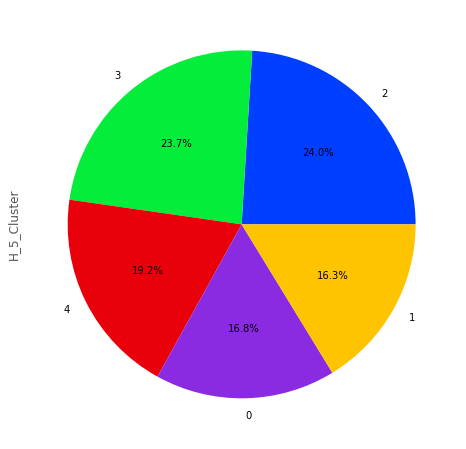

In [9]:
user_profile["H_5_Cluster"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')

# Cluster analysis - Cluster 1

In [10]:
cluster_1 = user_profile[(user_profile["H_5_Cluster"]==1)]

In [11]:
cluster_1.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,IDD_outgoing_Cumulative_Revenue,PEO_TV_Scaled,BB_Scaled,BIRTH_YEAR,...,Peo_Packages_if_Kids,Peo_Packages_if_Teenager_Students,Peo_Package_if_Working_Professionals,VAS_if_Kids,VAS_if_Teenager_Students,VAS_if_Working_Professionals,IDD_if_Family_Member_Abroad,KMOD_3_Cluster,H_3_Cluster,H_5_Cluster
count,488.000000,467.000000,470.000000,473.000000,221.000000,69.000000,6.900000e+01,78.000000,135.000000,357.000000,...,488.0,488.0,488.0,488.000000,488.000000,488.000000,488.000000,488.000000,488.0,488.0
mean,0.103435,0.104396,0.122230,0.114166,0.098400,0.138633,1.224580e+06,0.002804,0.326029,1965.759104,...,0.0,0.0,0.0,0.016393,0.043648,0.041701,0.047643,0.692623,0.0,1.0
std,0.122147,0.125664,0.137397,0.107775,0.181986,0.186043,2.358538e+06,0.024769,0.278137,12.510140,...,0.0,0.0,0.0,0.089131,0.112652,0.100908,0.279629,0.516451,0.0,0.0
min,0.001202,0.001202,0.001202,0.001202,0.002500,0.004808,1.200000e+03,0.000000,0.005208,1927.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.018599,0.019145,0.026510,0.027988,0.005833,0.012821,3.703300e+04,0.000000,0.089410,1957.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,0.061973,0.059238,0.083068,0.087781,0.017500,0.051282,1.792330e+05,0.000000,0.241319,1966.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0
75%,0.158298,0.150412,0.159402,0.167631,0.074167,0.189103,9.641930e+05,0.000000,0.500000,1976.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0
max,1.000000,1.000000,1.000000,0.712569,0.814500,0.806090,1.214834e+07,0.218750,1.000000,1999.000000,...,0.0,0.0,0.0,0.500000,0.600000,0.750000,2.250000,2.000000,0.0,1.0


#### Exceptional (Outlier Usage)

<AxesSubplot:>

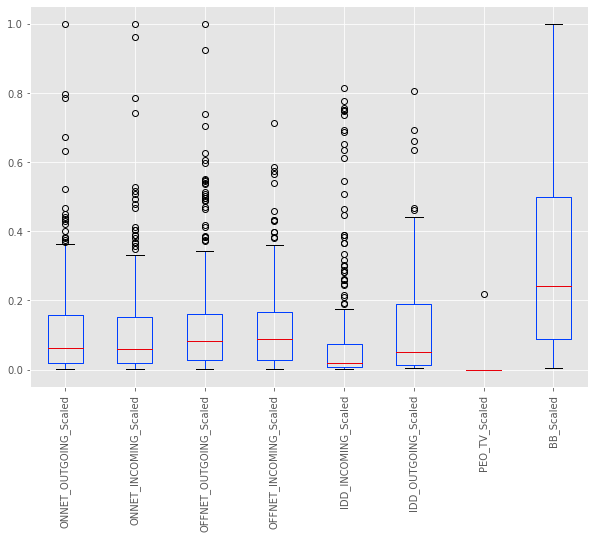

In [12]:
cluster_1.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [13]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

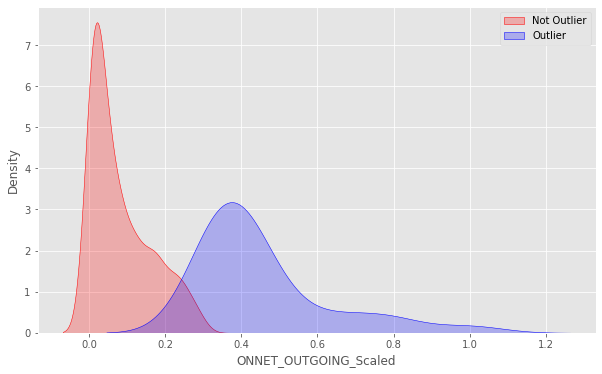

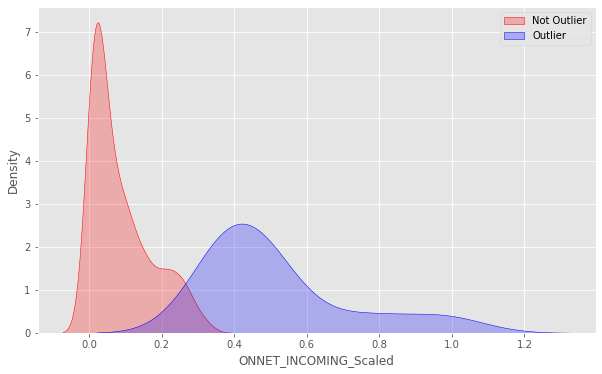

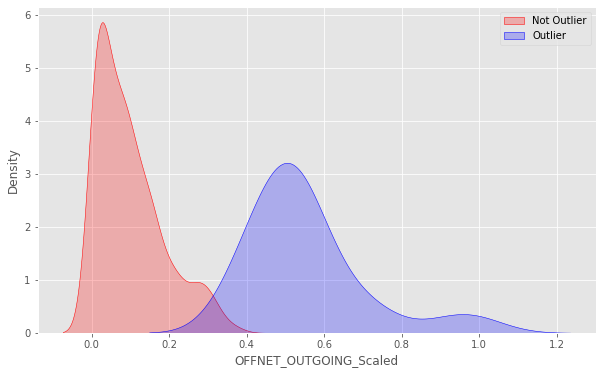

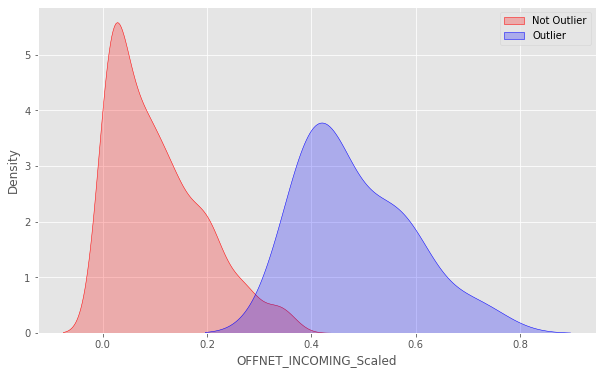

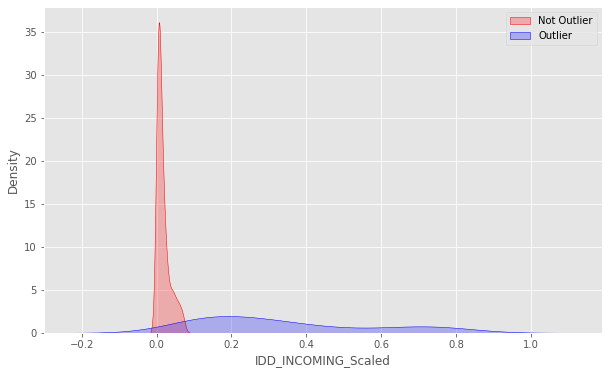

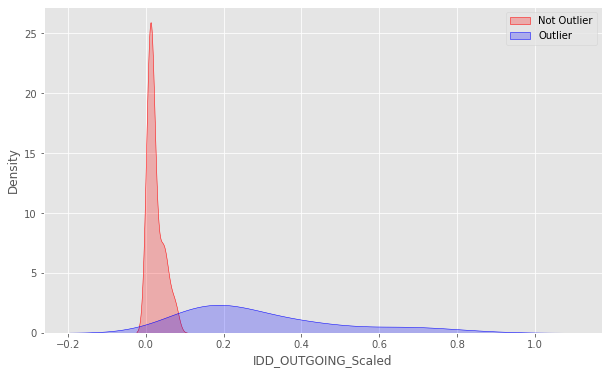

In [14]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_1[scaled_cols[i]][(cluster_1[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_1[scaled_cols[i]][(cluster_1[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [15]:
# Voice Outliers
cluster_1_out = cluster_1[(cluster_1["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_1["ONNET_INCOMING_Outlier"]=="YES") | (cluster_1["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_1["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_1["IDD_OUTGOING_Outlier"]=="YES") | (cluster_1["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

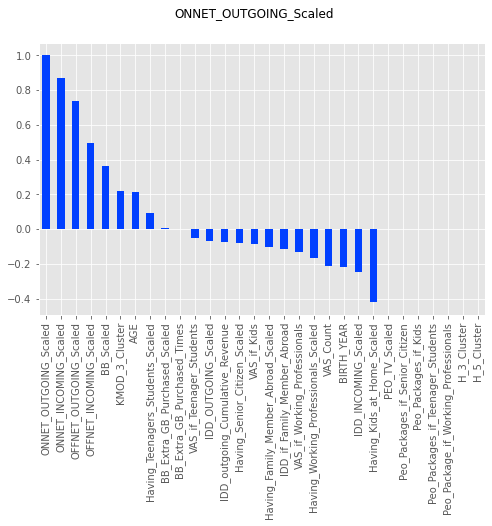

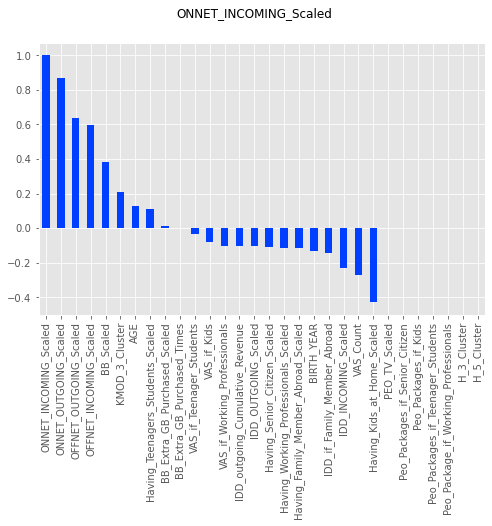

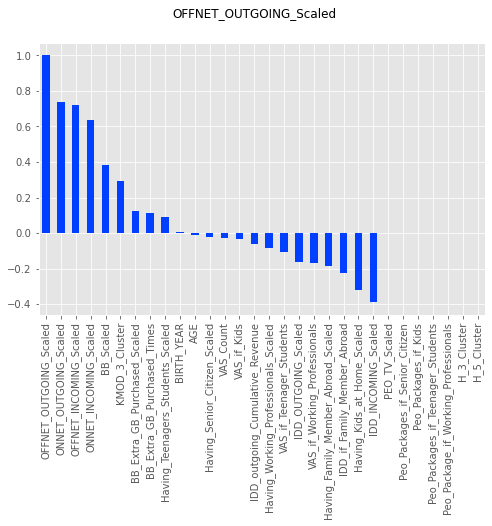

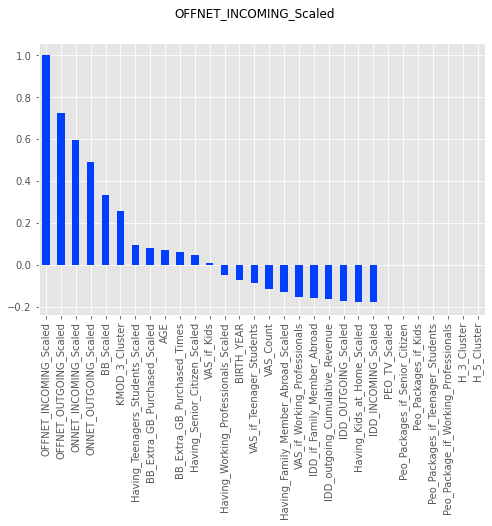

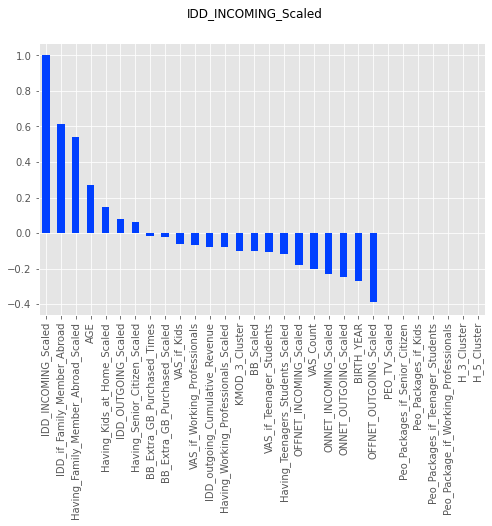

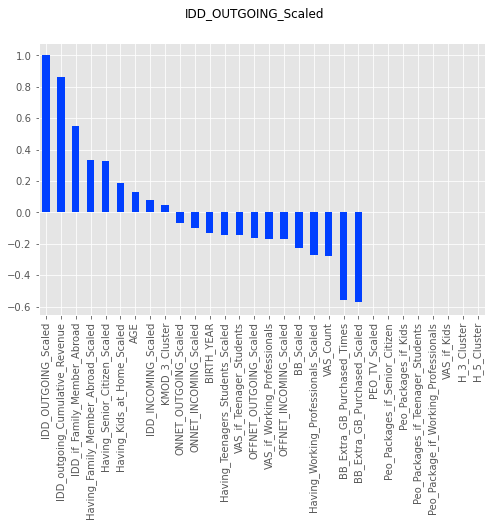

In [16]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_1_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [17]:
cluster_1_out_sub_df = pd.DataFrame([dict(cluster_1["Sub_Type"].value_counts()),dict(cluster_1_out["Sub_Type"].value_counts())])

In [18]:
cluster_1_out_sub_df

,TRIPLE_PLAY,DOUBLE_PLAY_BV,SINGLE_PLAY,DOUBLE_PLAY_PV,4G
0,208,141,125,13,1.0
1,71,11,10,1,NaN


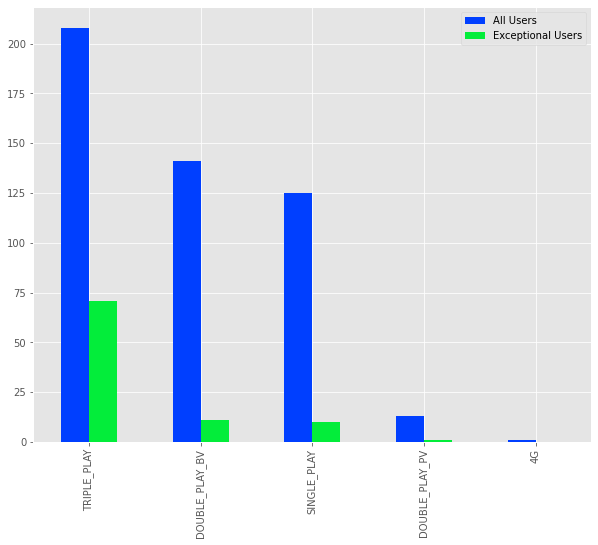

In [19]:
fig, ax = plt.subplots()
cluster_1_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

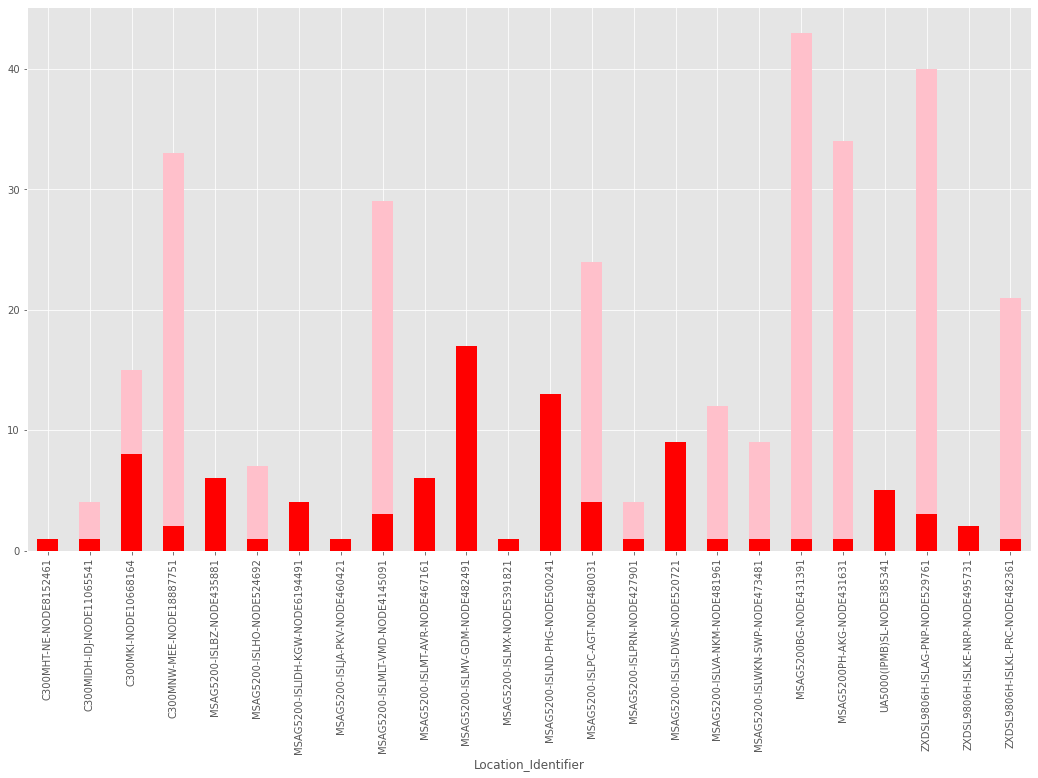

In [20]:
cluster_1_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]
cluster_1_out_loc = cluster_1_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

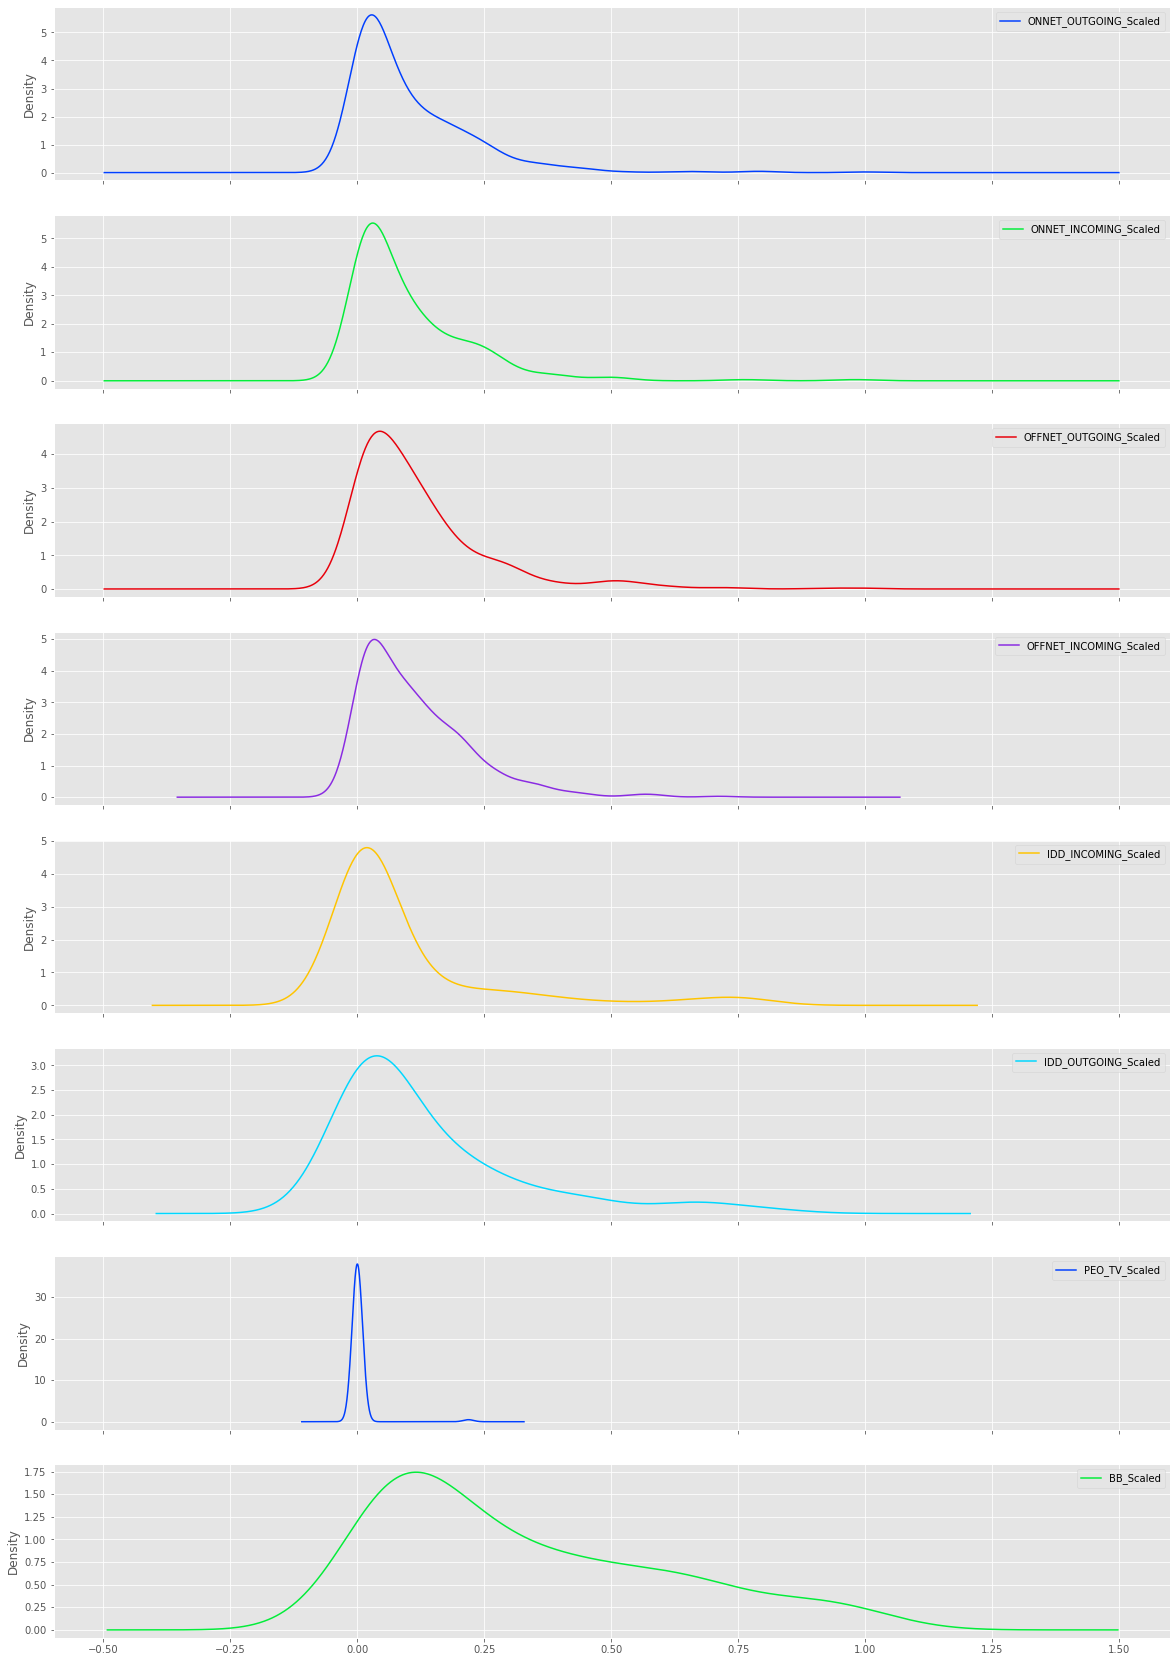

In [21]:
cluster_1.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'VAS_Count'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>],
       [<AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
 

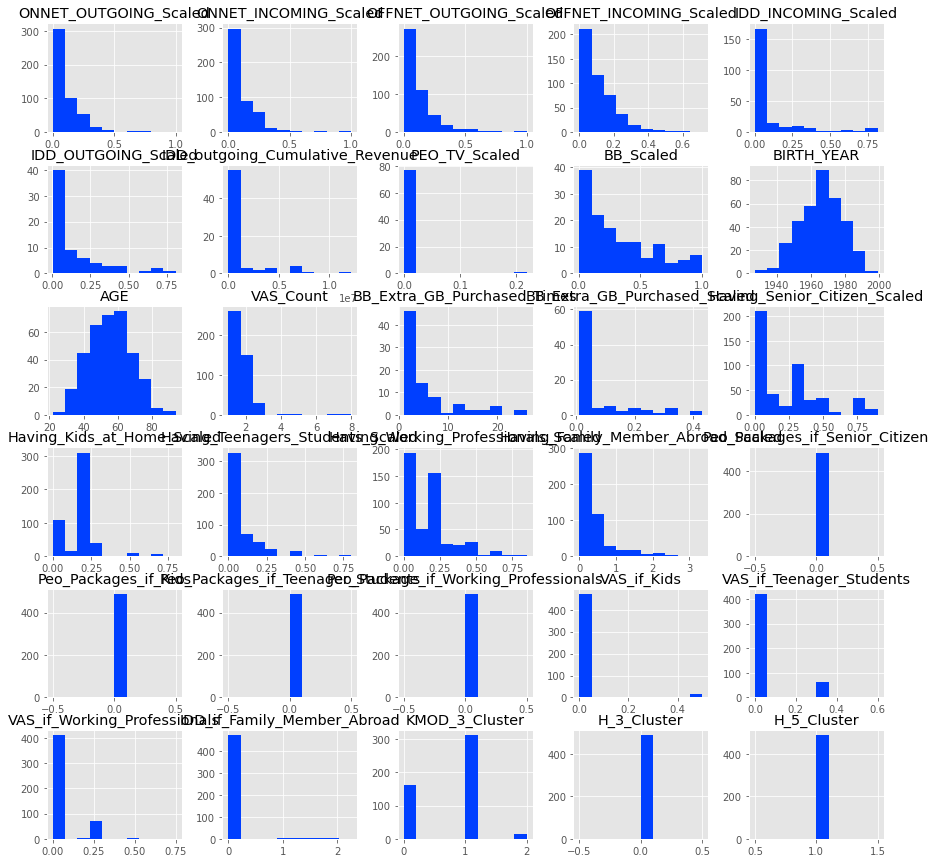

In [22]:
cluster_1.hist(figsize=(15,15))

### Subscription Type and Usage

In [23]:
cluster_1["Sub_Type"].value_counts()

TRIPLE_PLAY       208
DOUBLE_PLAY_BV    141
SINGLE_PLAY       125
DOUBLE_PLAY_PV     13
4G                  1
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

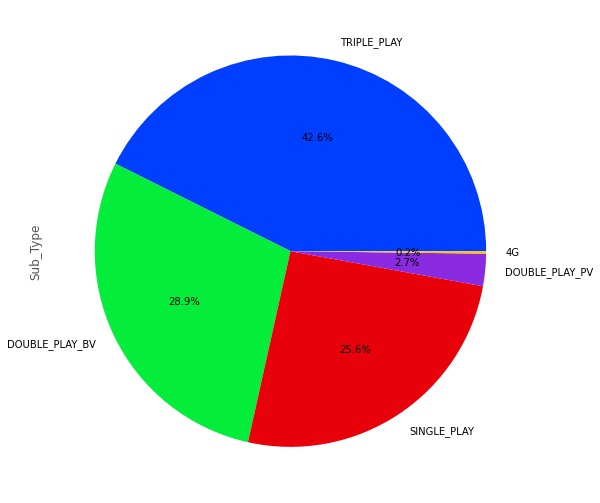

In [24]:
cluster_1["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [25]:
len(cluster_1[(cluster_1["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

480

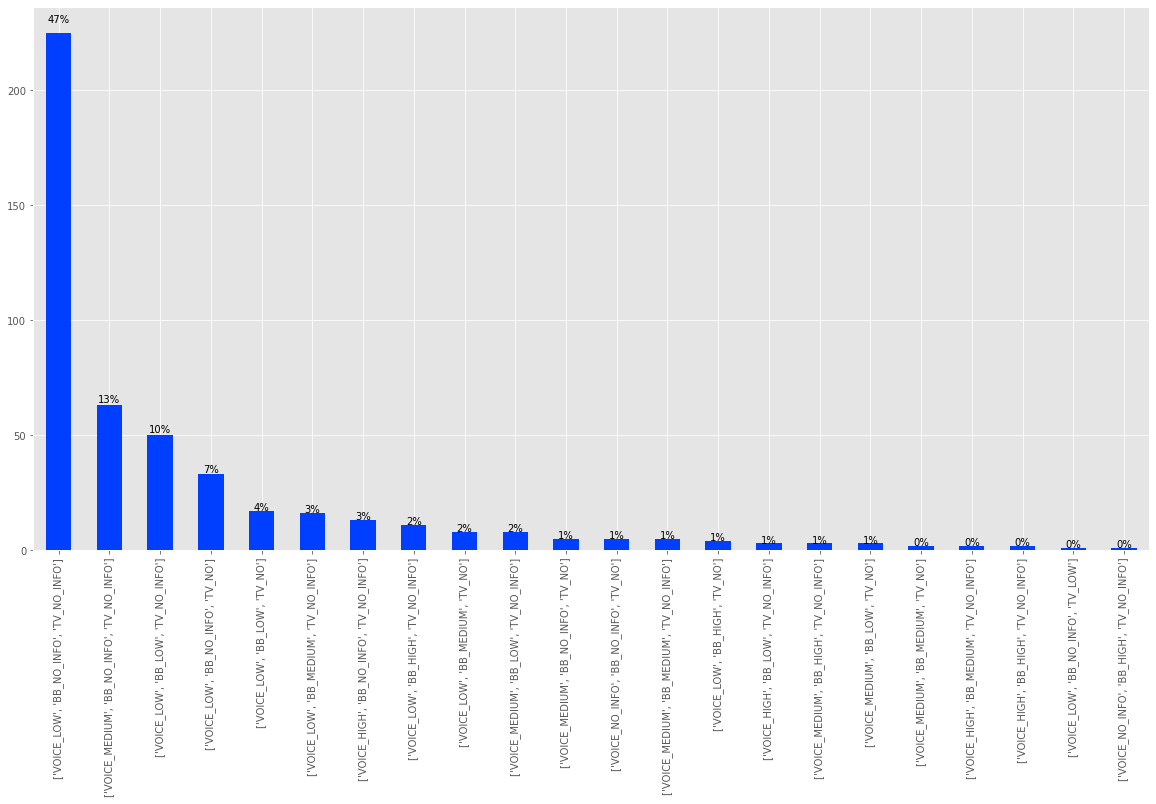

In [26]:
ax =cluster_1[(cluster_1["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Subscription state

####  Subscription: Assumed vs. Actual

<AxesSubplot:ylabel='Sub_Type_State'>

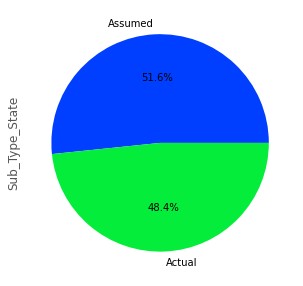

In [27]:
cluster_1["Sub_Type_State"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')

<AxesSubplot:ylabel='Sub_Update_Status'>

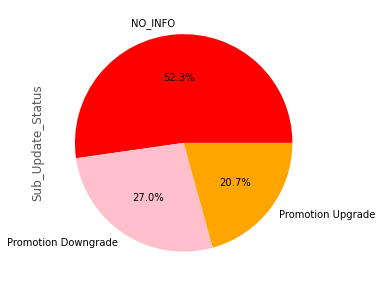

In [28]:
cluster_1["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update_Status'>

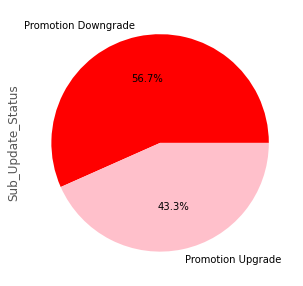

In [130]:
cluster_1[(cluster_1["Sub_Update_Status"]!= "NO_INFO")]["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update'>

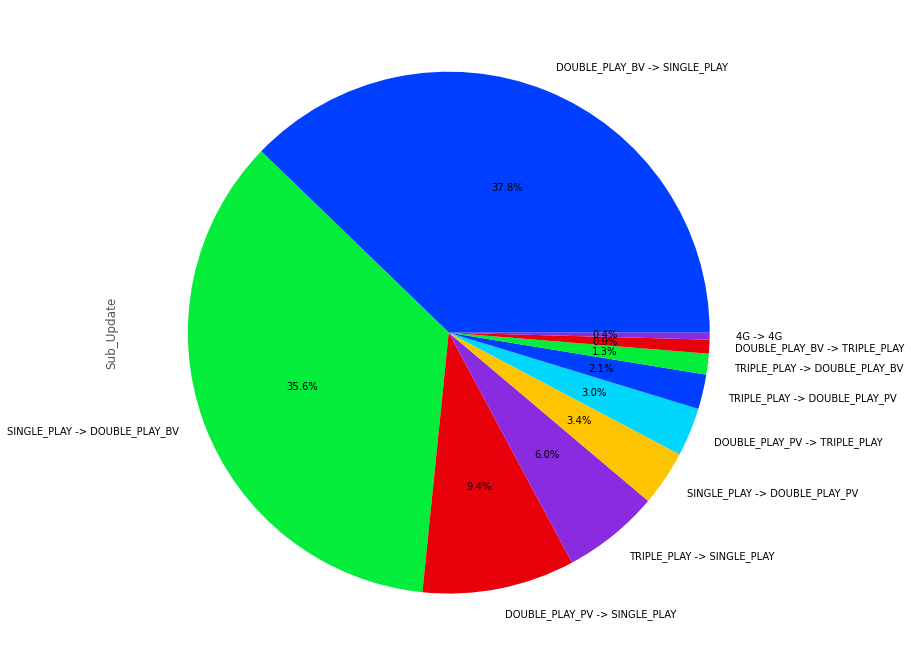

In [29]:
cluster_1[(cluster_1["Sub_Update"] !="NO_INFO")]["Sub_Update"].value_counts().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%')

### Voice Calls Usage

In [30]:
cluster_1["VOICE_Categorical"].value_counts()

LOW        365
MEDIUM      89
HIGH        20
NO_INFO     14
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

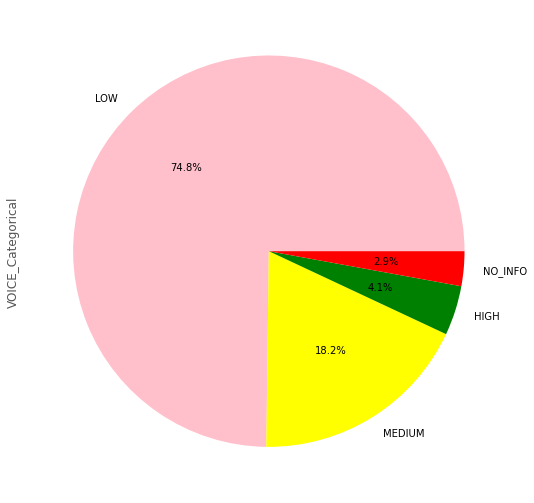

In [31]:
cluster_1["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green','red'] )

### VOICE VAS Packages

In [32]:
count_dict = dict(cluster_1["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

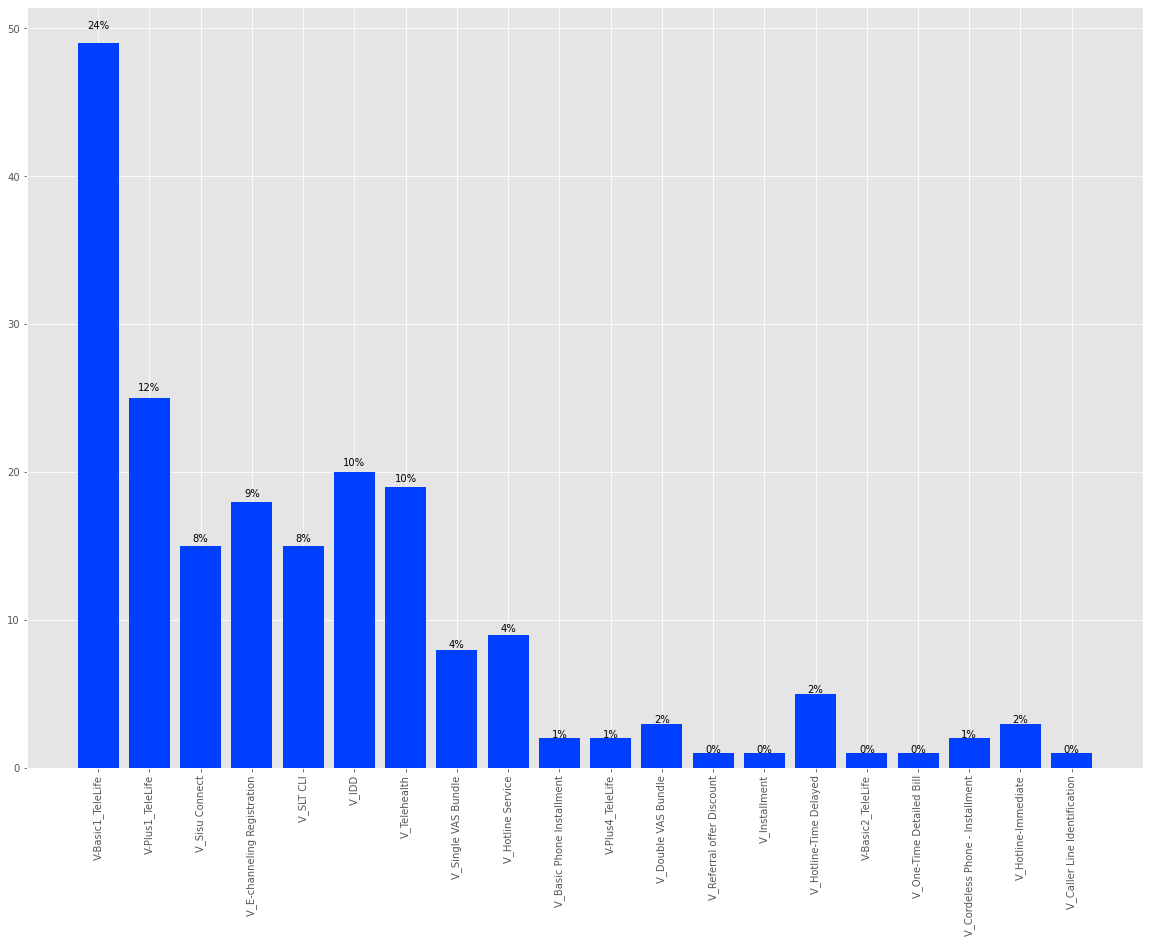

In [33]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [34]:
cluster_1["IDD_Overall_Categorical"].value_counts()

NO_INFO    256
LOW        217
MEDIUM      12
HIGH         3
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

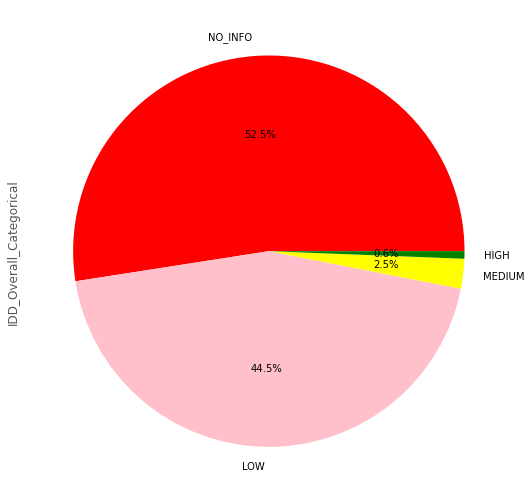

In [50]:
cluster_1["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green'] )

#### IDD Calling country analysis

In [36]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [37]:
cluster_1_idd_country_df = cluster_1[["event_source.hash","IDD_incoming_country"]]

In [38]:
cluster_1_idd_country_df["IDD_incoming_country"] = cluster_1_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-38-fb17b23ded5f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
cluster_1_idd_country_df = cluster_1_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

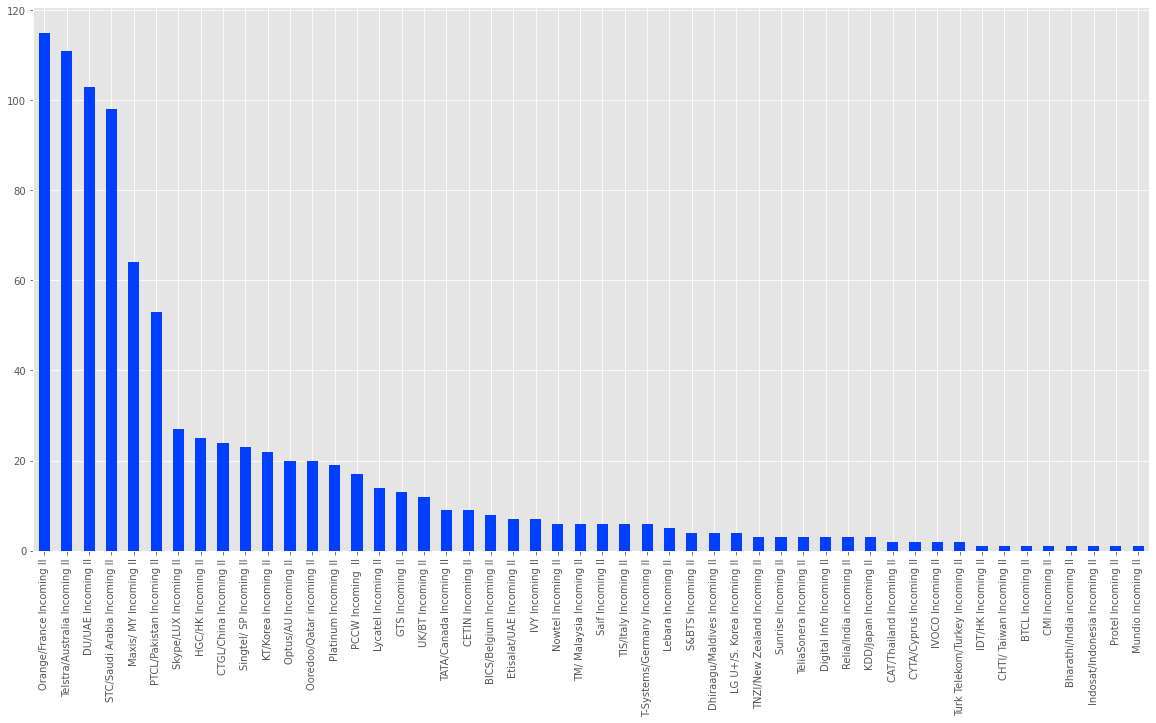

In [40]:
cluster_1_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [41]:
cluster_1_idd_out_country_df = cluster_1[["event_source.hash","IDD_outgoing_country"]]

In [42]:
cluster_1_idd_out_country_df["IDD_outgoing_country"] = cluster_1_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-42-cee6c1f97979>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
cluster_1_idd_out_country_df = cluster_1_idd_out_country_df.explode("IDD_outgoing_country")

In [44]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [45]:
cluster_1_idd_out_country_df["IDD_outgoing_country"] = cluster_1_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

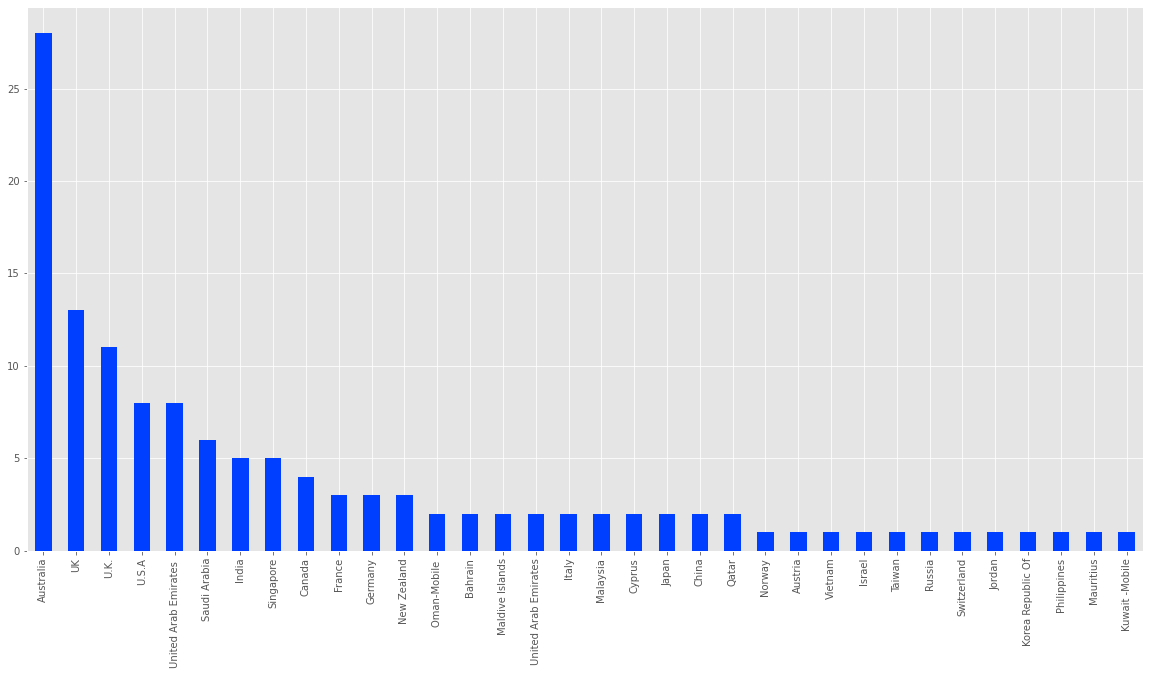

In [46]:
cluster_1_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [47]:
cluster_1["PEO_TV_Categorical"].value_counts()

NO_INFO    410
NO          77
LOW          1
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 1

<AxesSubplot:ylabel='PEO_TV_Categorical'>

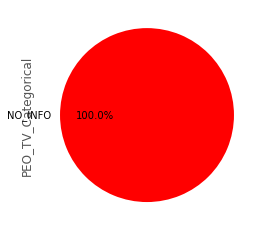

In [52]:
cluster_1_peo = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY")]
cluster_1_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.1f%%',colors = ['red','yellow','pink','orange'])

#### PeoTV Usage among Double Play PV users in Cluster 1

<AxesSubplot:ylabel='PEO_TV_Categorical'>

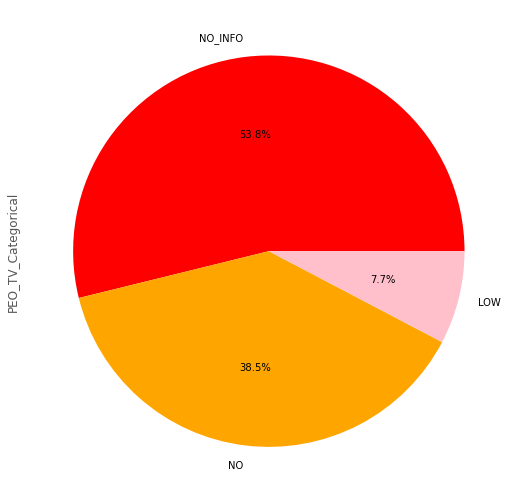

In [54]:
cluster_1_peo_pv = cluster_1[(cluster_1["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_1_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','orange','pink','orange','red'])

#### Only 1 User Using Peo TV

In [55]:
cluster_1_peo_pv["PEO_TV_Categorical"].value_counts()

NO_INFO    7
NO         5
LOW        1
Name: PEO_TV_Categorical, dtype: int64

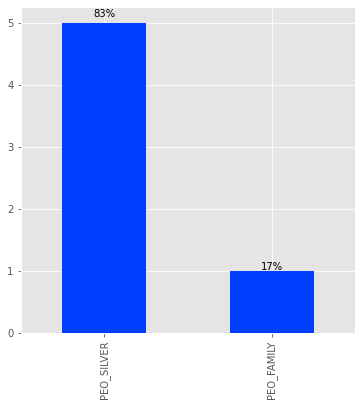

In [56]:
ax =cluster_1_peo_pv[(cluster_1_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(6,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [57]:
count_dict = dict(cluster_1["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

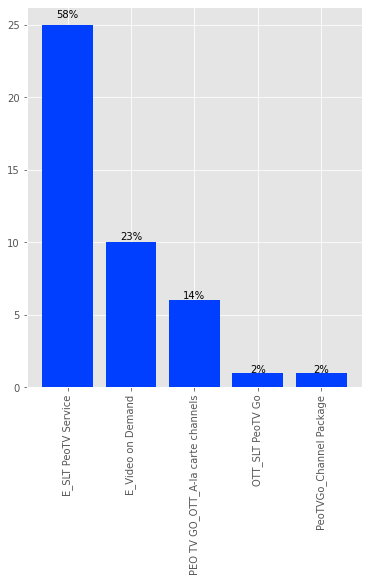

In [58]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(6,7))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [59]:
cluster_1["BB_Categorical"].value_counts()

NO_INFO    353
LOW         81
MEDIUM      33
HIGH        21
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

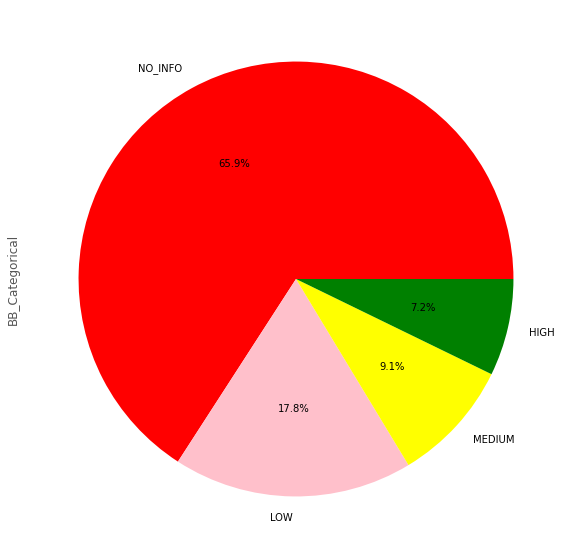

In [60]:
cluster_1_bb = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY")]
cluster_1_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 1

<AxesSubplot:ylabel='BB_Categorical'>

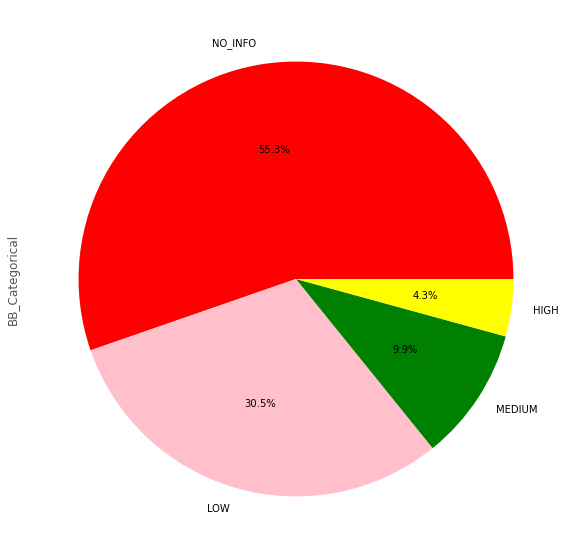

In [61]:
cluster_1_bb_dp = cluster_1[(cluster_1["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_1_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [62]:
count_dict = dict(cluster_1["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

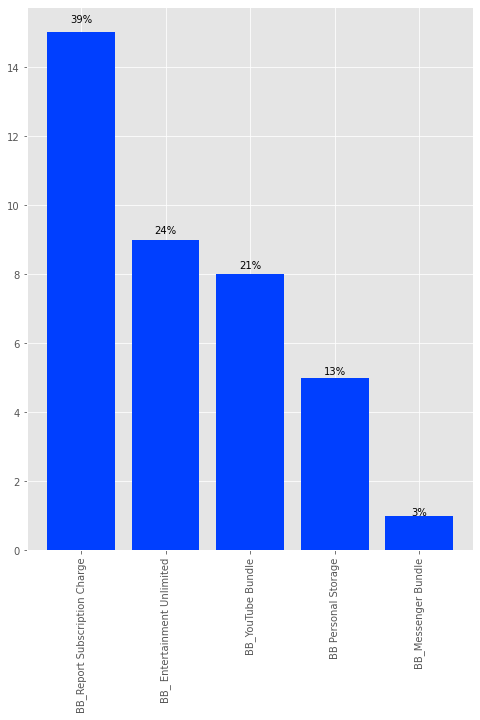

In [63]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [64]:
extra_gb_freq_users = cluster_1[(cluster_1["BB_Extra_GB_Purchased_Scaled"]>0.5)]

In [65]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

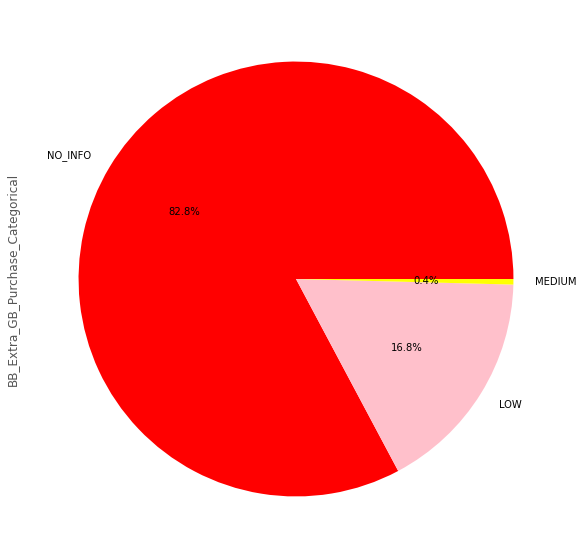

In [66]:
cluster_1["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

## User Location

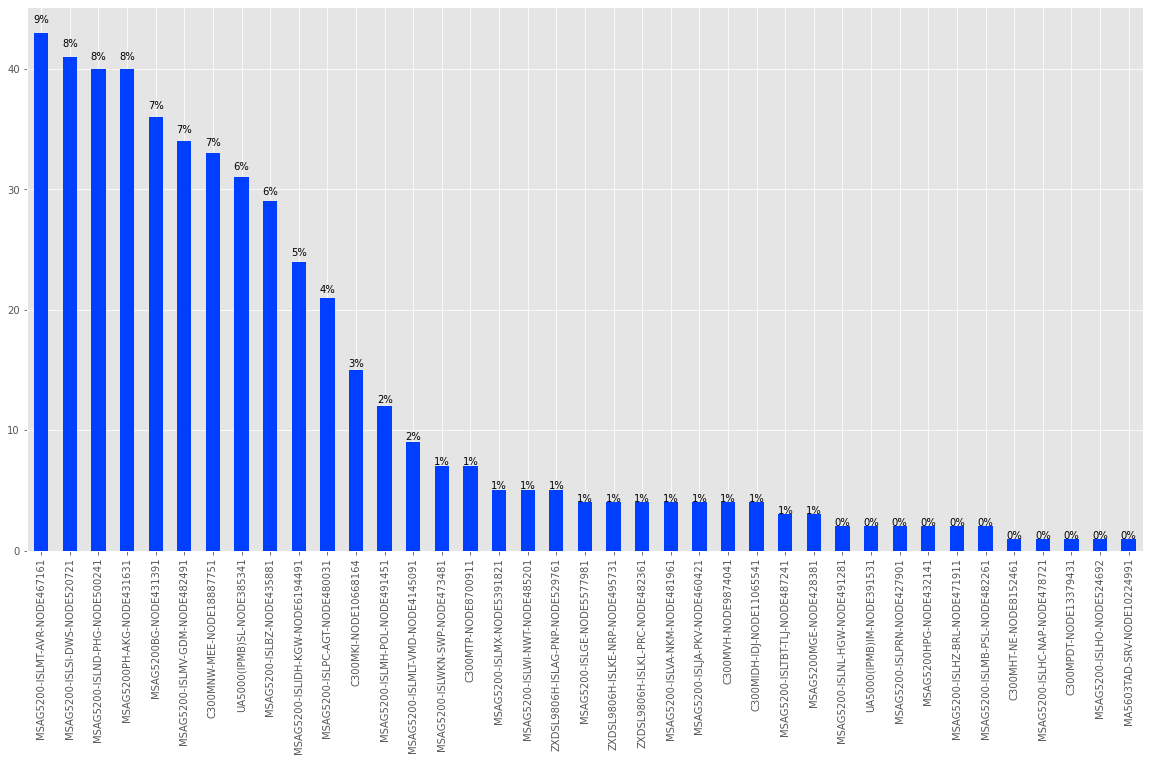

In [70]:
ax =cluster_1["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

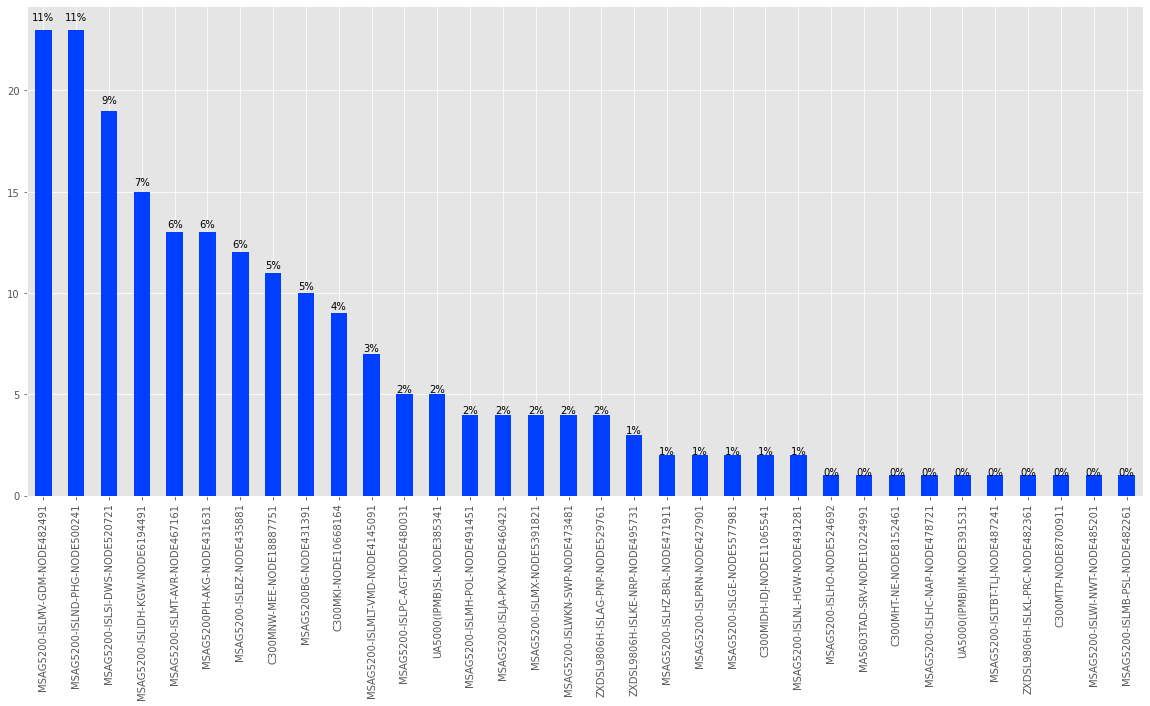

In [71]:
ax =cluster_1_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,9))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

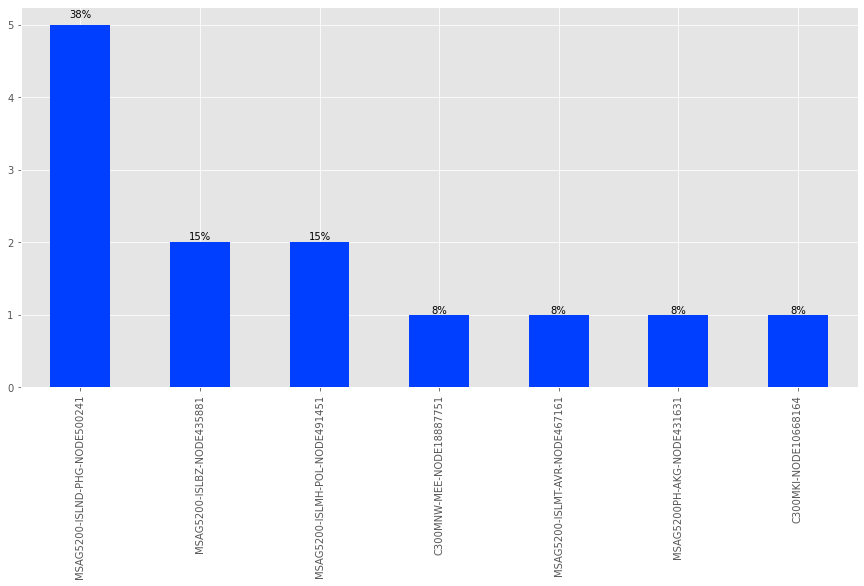

In [72]:
ax =cluster_1_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

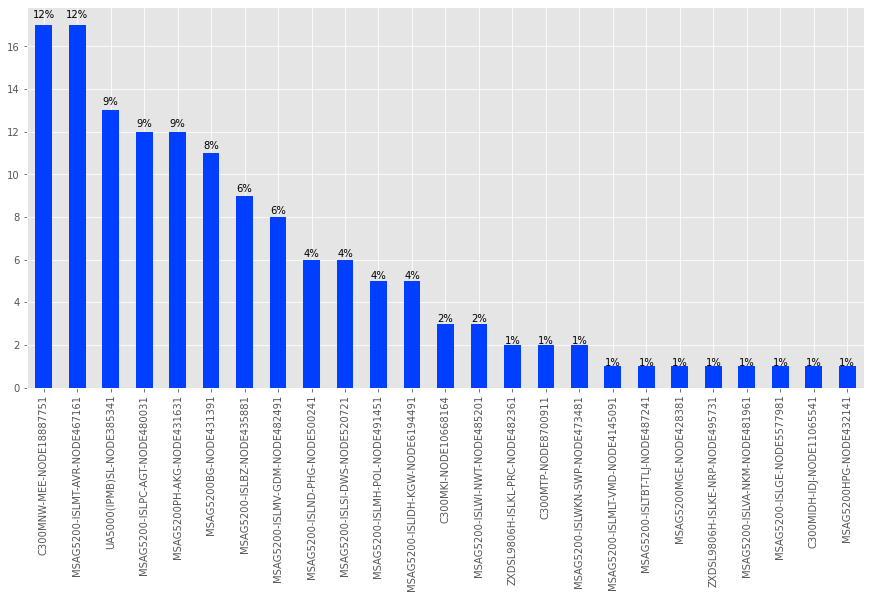

In [73]:
ax =cluster_1_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

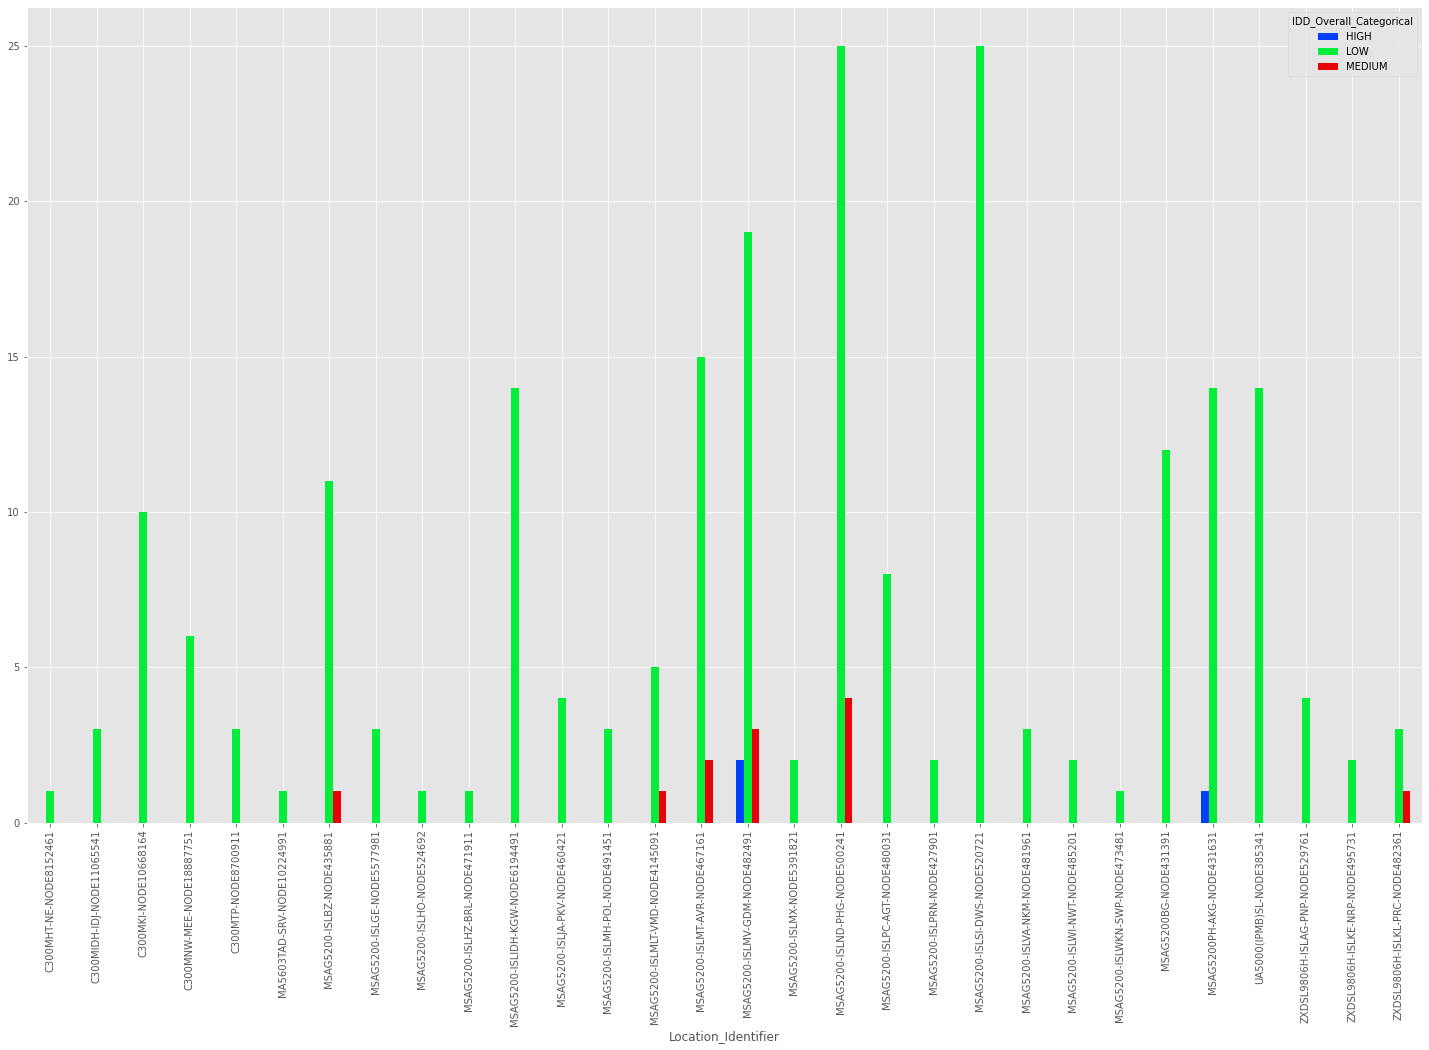

In [75]:
#ax =cluster_1[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_1[((cluster_1["Location_Identifier"] != "NO_INFO") & (cluster_1["IDD_Overall_Categorical"] != "NO_INFO"))].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-76-8d254992a339>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(2, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(3, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(4, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(5, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(6, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(7, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(8, 0, 'C300MKI-NODE10668164'),
 Text(9, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(10, 0, 'MSAG5200-ISLJA-PKV-NODE460421'),
 Text(11, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(12, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(13, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(14, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(15, 0, 'MA5603TAD-SRV-NODE10224991'),
 Text(16, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(17, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(18, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(19, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(20, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(21, 0, 'MSAG5200HPG-NODE432141'),
 Text(22, 

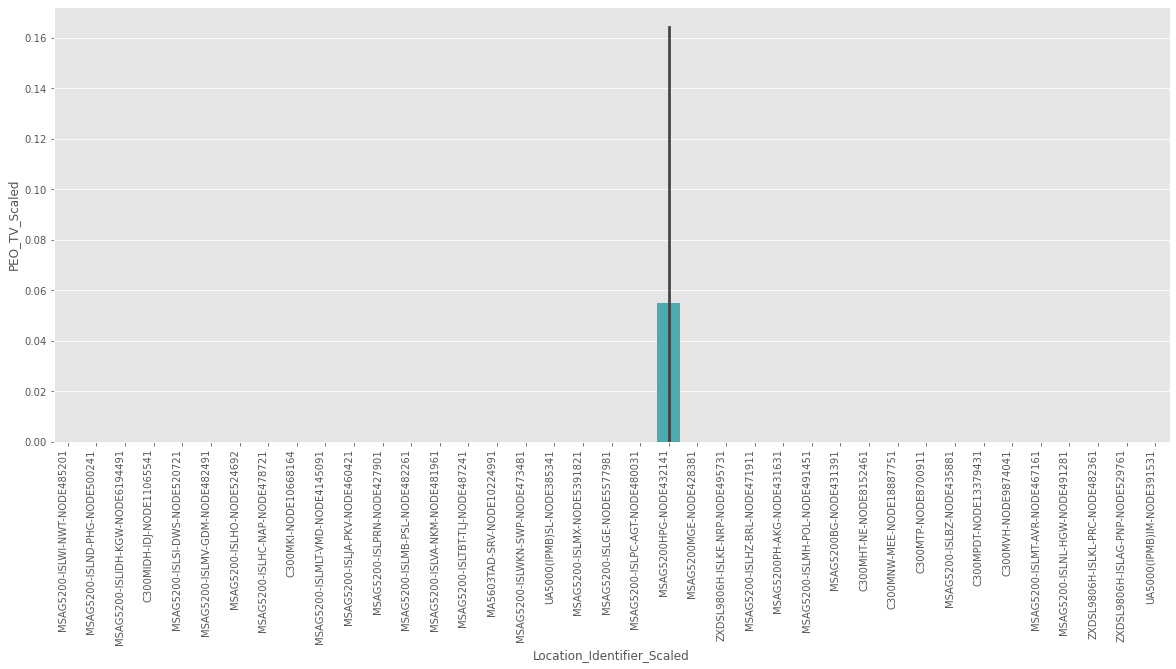

In [76]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_1[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [77]:
location_arr = cluster_1["Location_Identifier"].unique()

<ipython-input-78-f8e68635a657>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



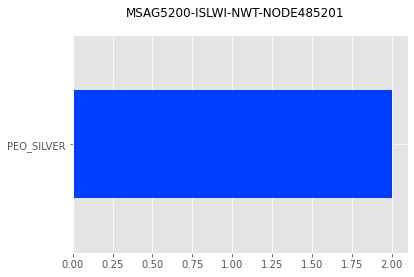

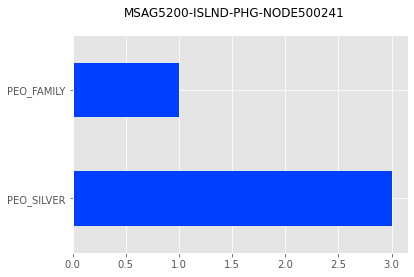

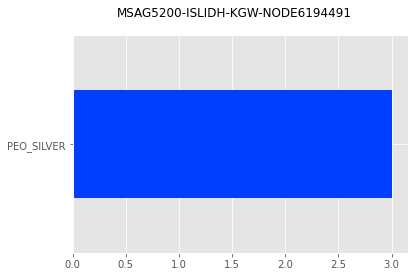

<Figure size 432x288 with 0 Axes>

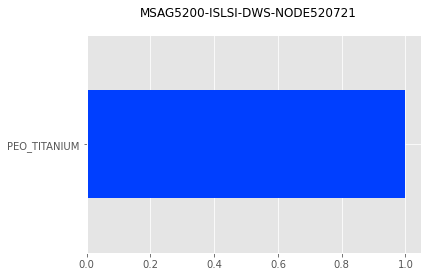

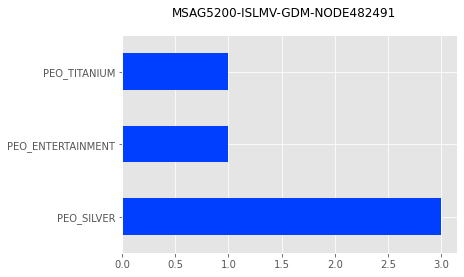

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

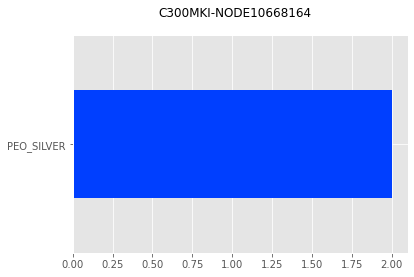

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

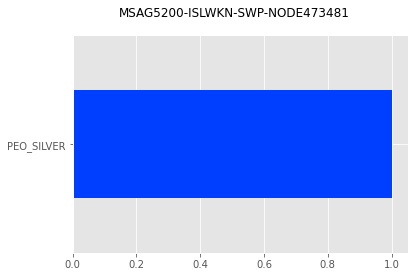

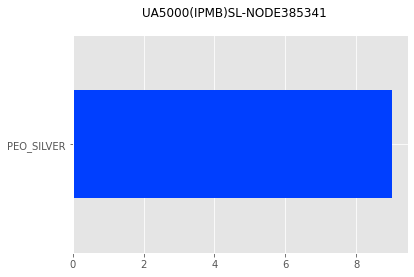

<Figure size 432x288 with 0 Axes>

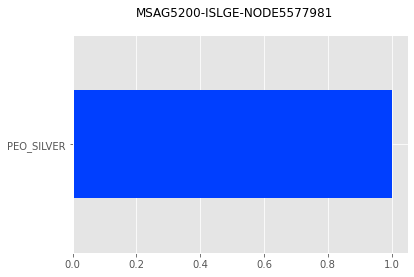

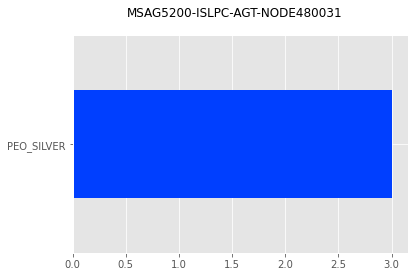

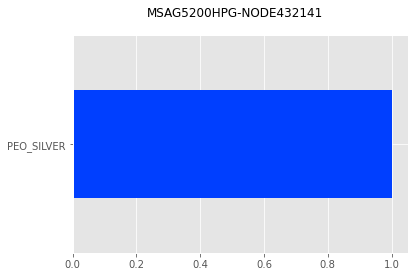

<Figure size 432x288 with 0 Axes>

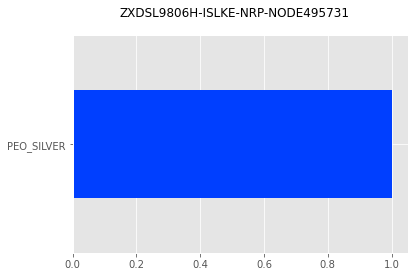

<Figure size 432x288 with 0 Axes>

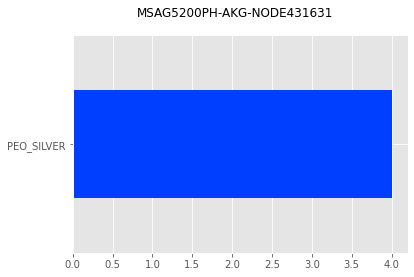

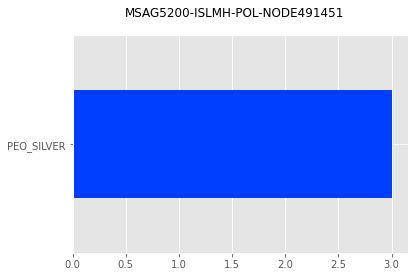

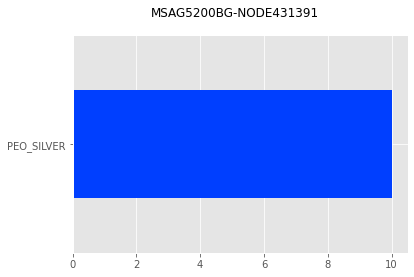

<Figure size 432x288 with 0 Axes>

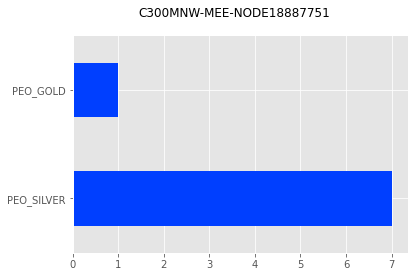

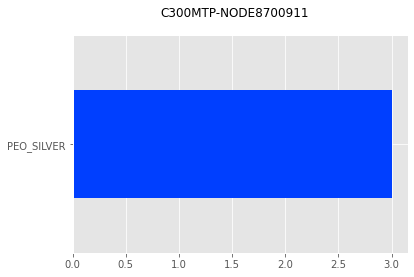

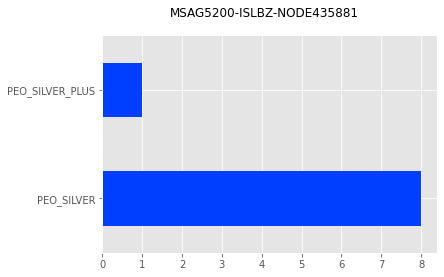

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

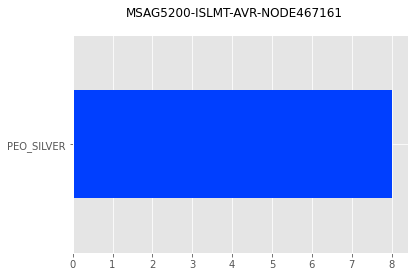

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [78]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-79-0bf32acdb903>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

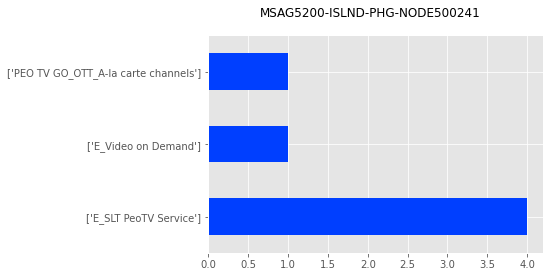

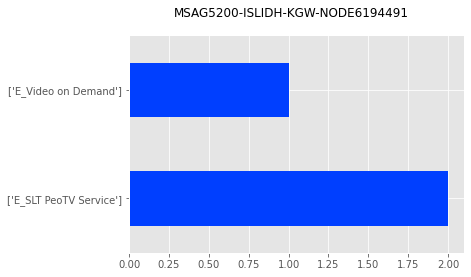

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

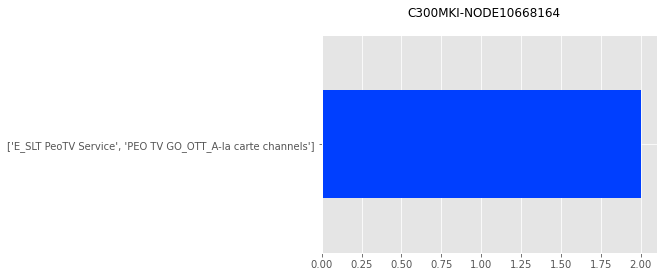

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

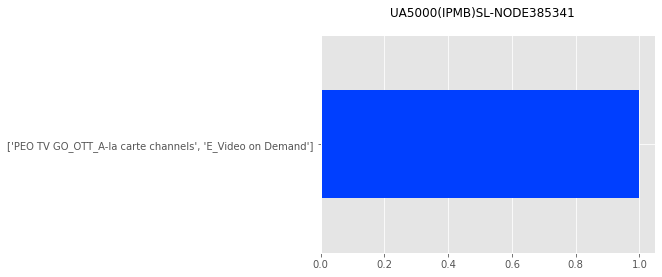

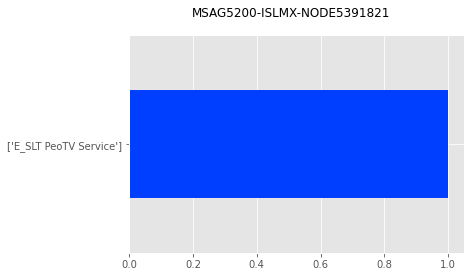

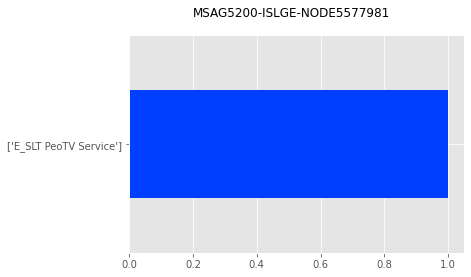

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

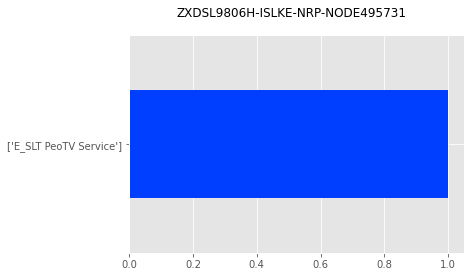

<Figure size 432x288 with 0 Axes>

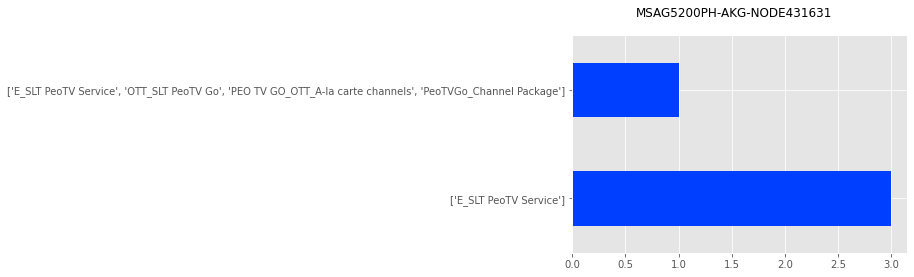

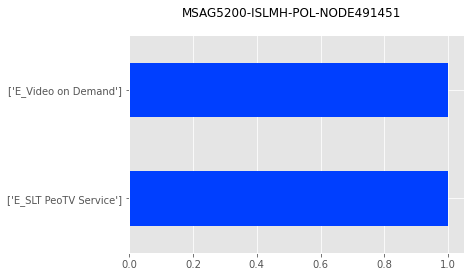

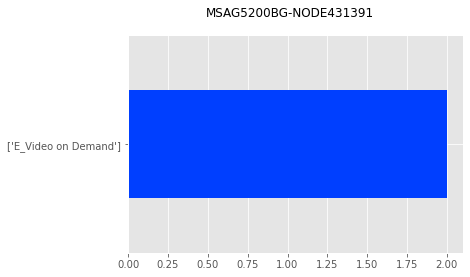

<Figure size 432x288 with 0 Axes>

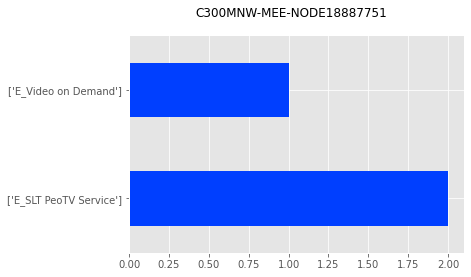

<Figure size 432x288 with 0 Axes>

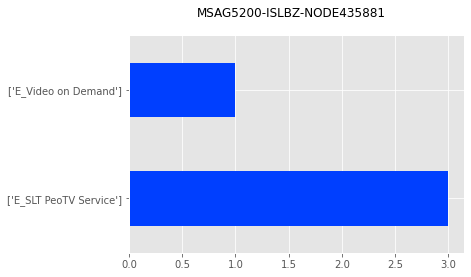

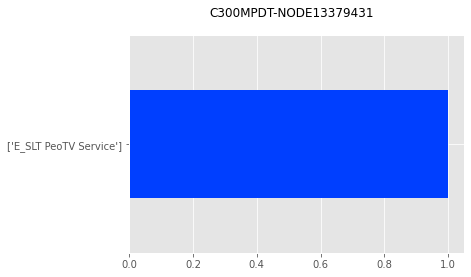

<Figure size 432x288 with 0 Axes>

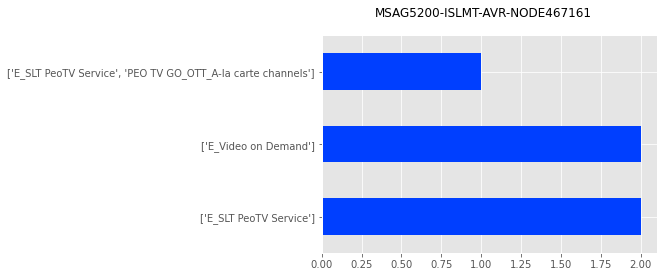

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [79]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-80-0445f04f24fb>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



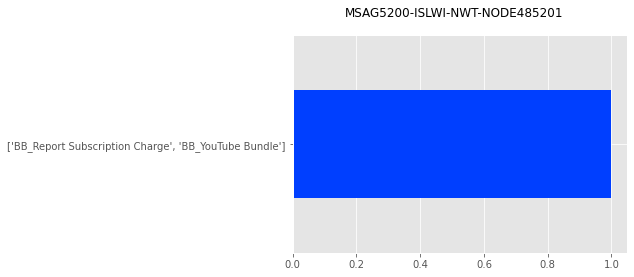

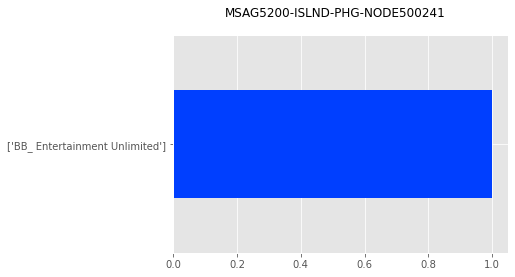

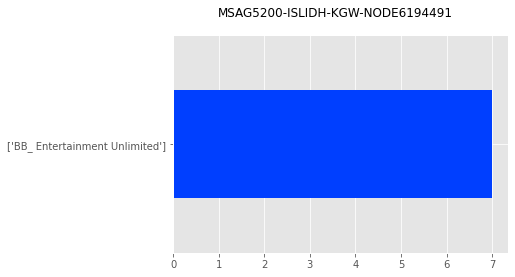

<Figure size 432x288 with 0 Axes>

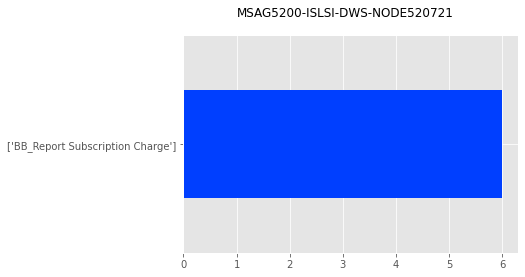

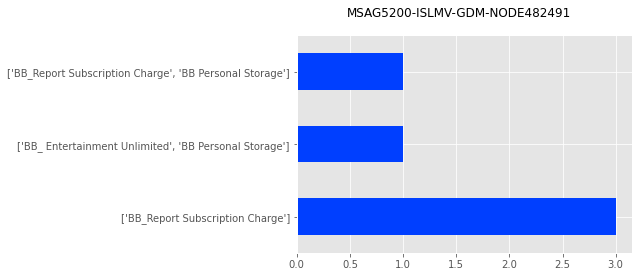

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

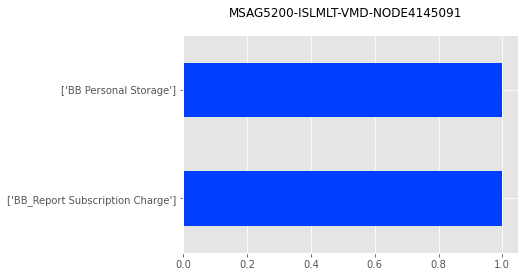

<Figure size 432x288 with 0 Axes>

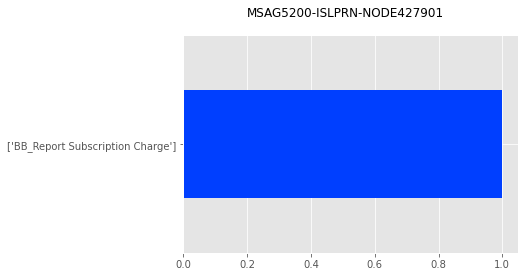

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

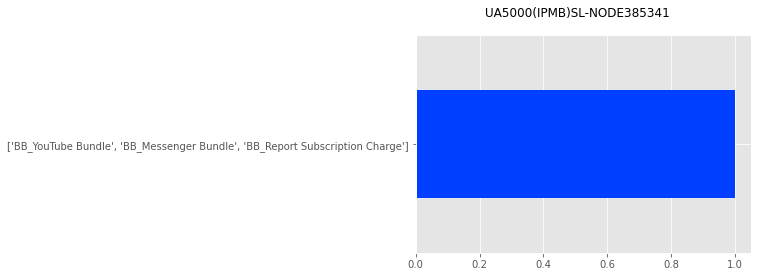

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

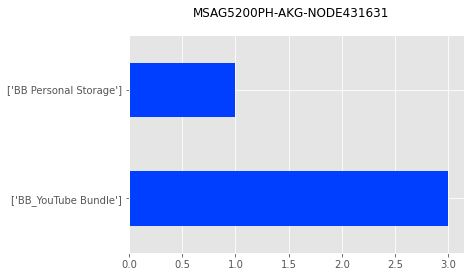

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

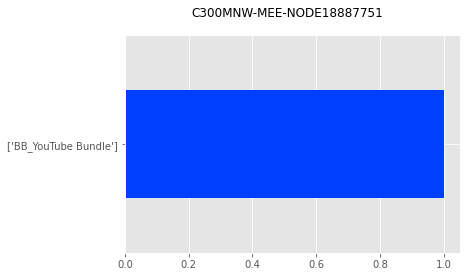

<Figure size 432x288 with 0 Axes>

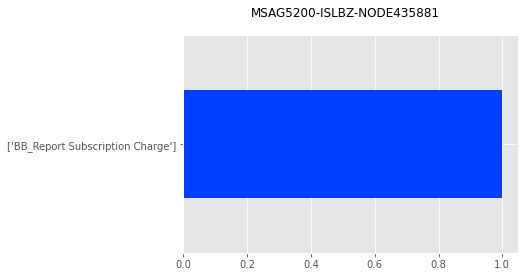

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

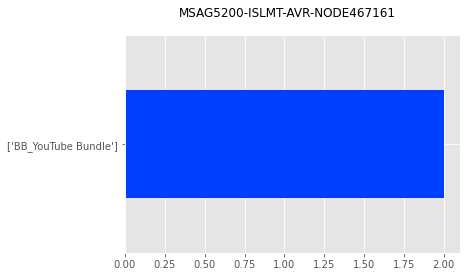

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

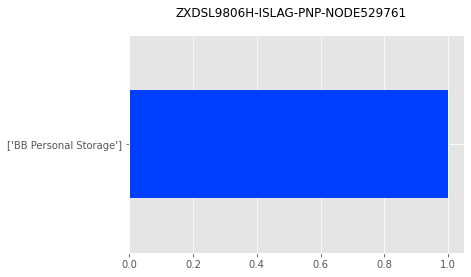

<Figure size 432x288 with 0 Axes>

In [80]:
for loc in location_arr:
    user_loc_df = cluster_1[((cluster_1["Location_Identifier"]==loc) & (cluster_1["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

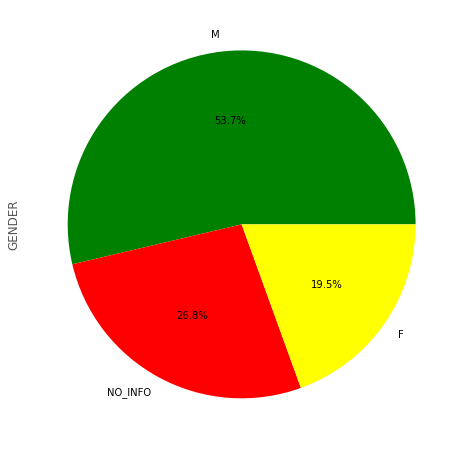

In [82]:
cluster_1["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','red','yellow'])

<AxesSubplot:ylabel='GENDER'>

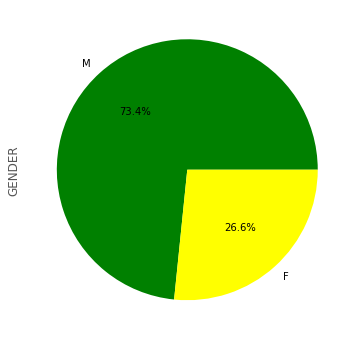

In [83]:
cluster_1[(cluster_1["GENDER"]!= "NO_INFO")]["GENDER"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors = ['green','yellow'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

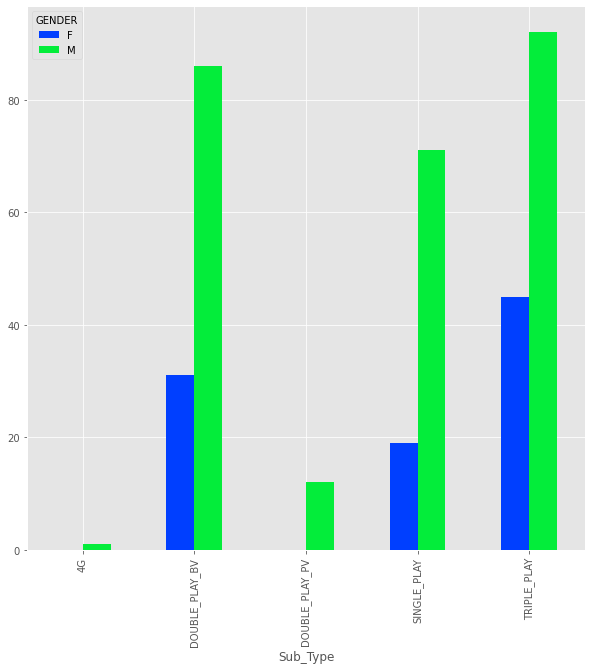

In [84]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

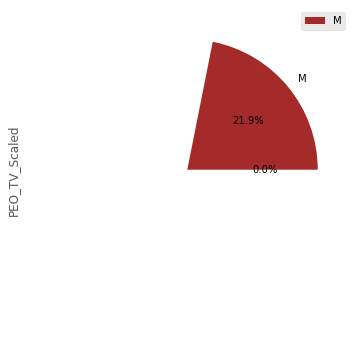

In [85]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

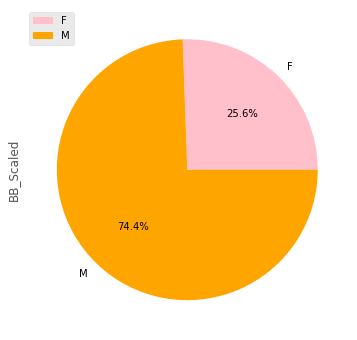

In [86]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

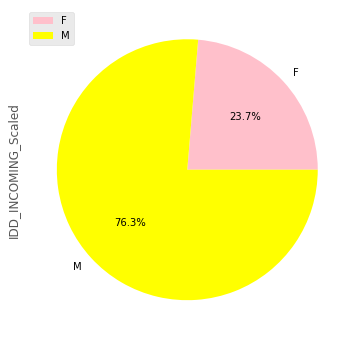

In [87]:
cluster_1[(cluster_1["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","yellow"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

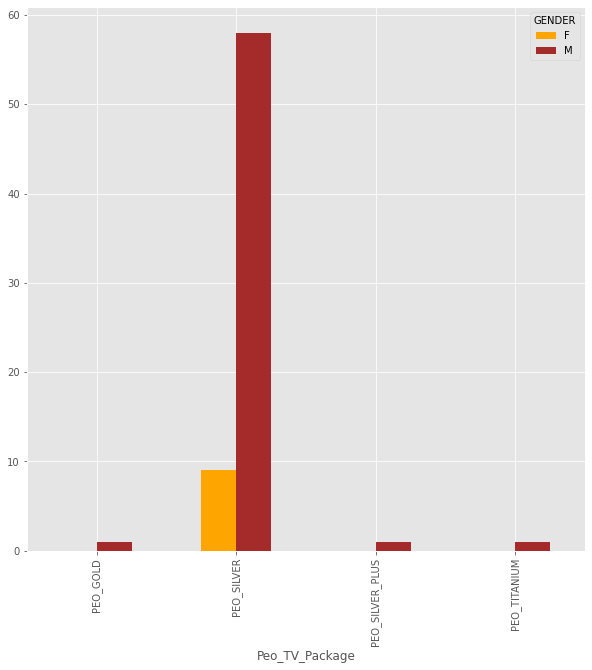

In [88]:
 cluster_1[((cluster_1["GENDER"] != "NO_INFO") &(cluster_1["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [89]:
cluster_1["AGE"].describe()

count    357.000000
mean      55.240896
std       12.510140
min       22.000000
25%       45.000000
50%       55.000000
75%       64.000000
max       94.000000
Name: AGE, dtype: float64

In [90]:
bins = [0, 30,55,65,85,110]
cluster_1['AGE_Groups'] = pd.cut(cluster_1['AGE'], bins)

<ipython-input-90-0c2e78407b81>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

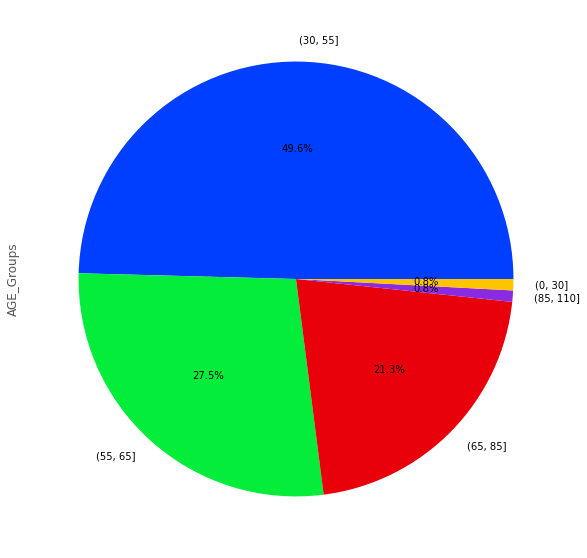

In [91]:
cluster_1["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

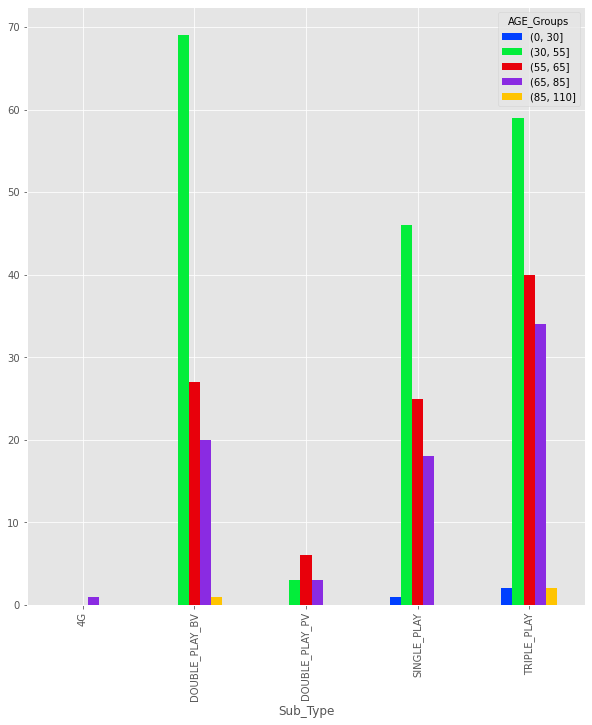

In [92]:
cluster_1.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Age Groups

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

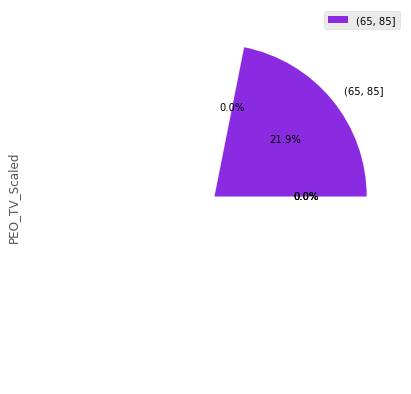

In [93]:
cluster_1[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Age Groups

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

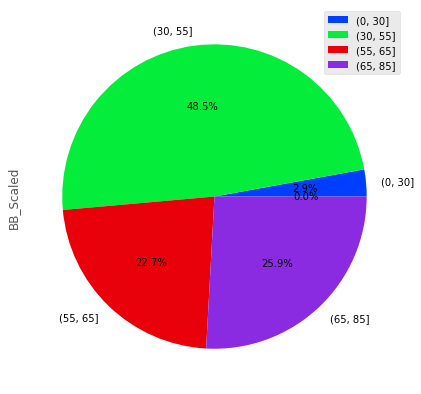

In [94]:
cluster_1[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Age Groups

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

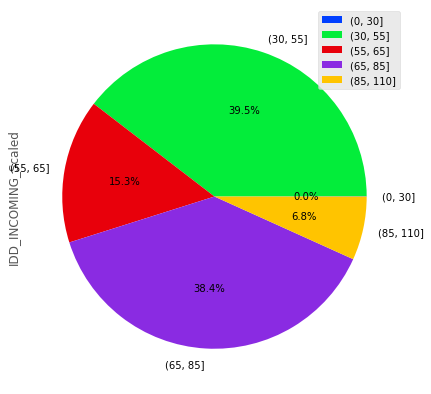

In [95]:
cluster_1[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

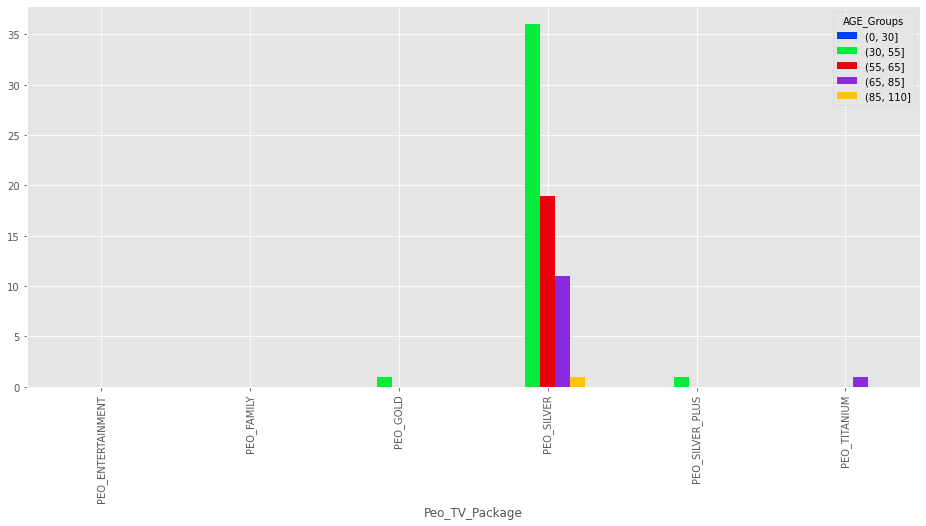

In [97]:
cluster_1[(cluster_1["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(16,7))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [98]:
cluster_1["Having_Insurance"].value_counts()

NO_INFO    404
YES         84
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

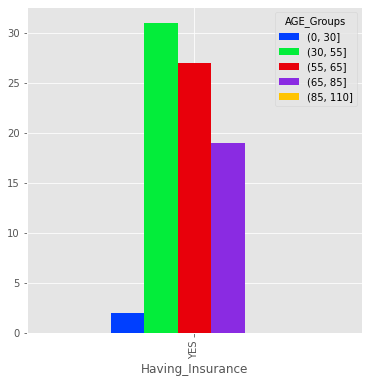

In [99]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

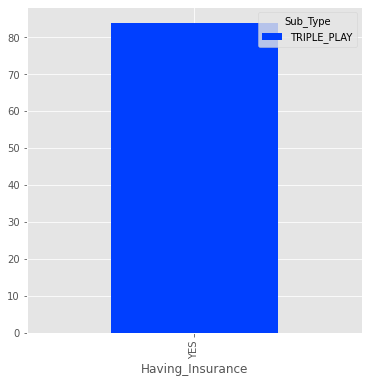

In [100]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

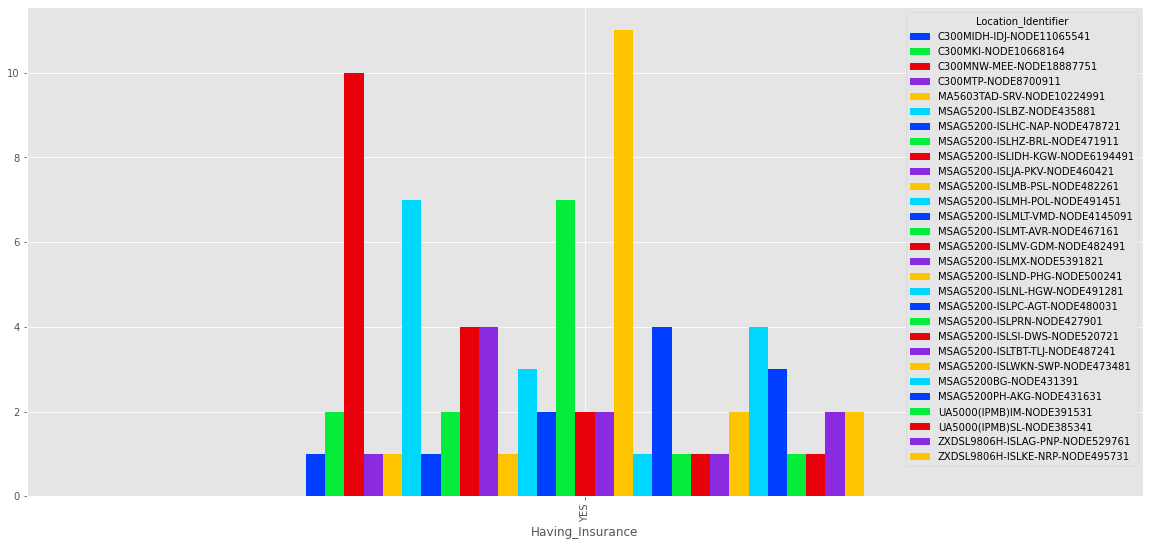

In [101]:
cluster_1[(cluster_1["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [102]:
cluster_1["Having_Senior_Citizen"].value_counts(normalize=True)

NO_INFO    0.821721
YES        0.178279
Name: Having_Senior_Citizen, dtype: float64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

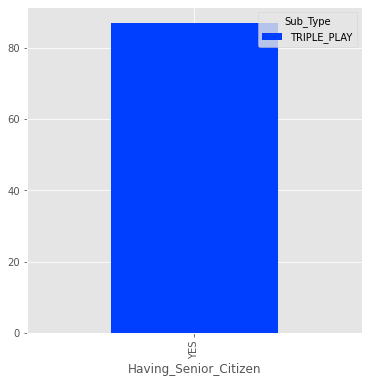

In [103]:
cluster_1[(cluster_1["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

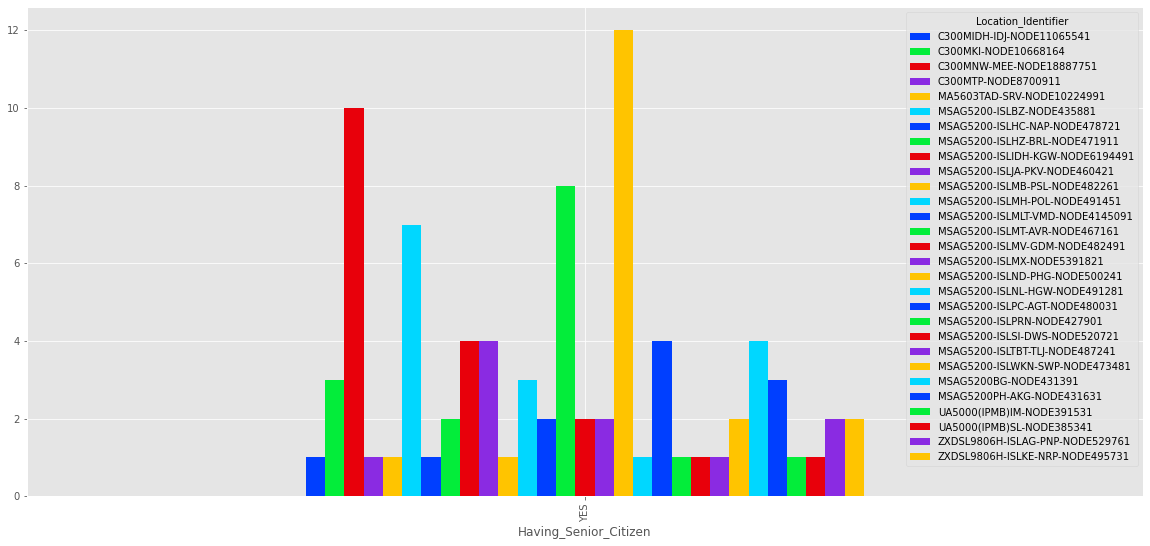

In [104]:
cluster_1[(cluster_1["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [105]:
cluster_1["Having_Family_Member_Abroad"].value_counts(normalize=True)

NO_INFO    0.727459
YES        0.272541
Name: Having_Family_Member_Abroad, dtype: float64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

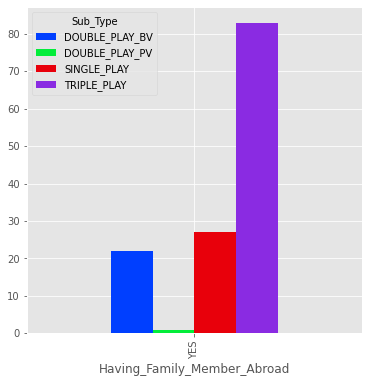

In [106]:
cluster_1[(cluster_1["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

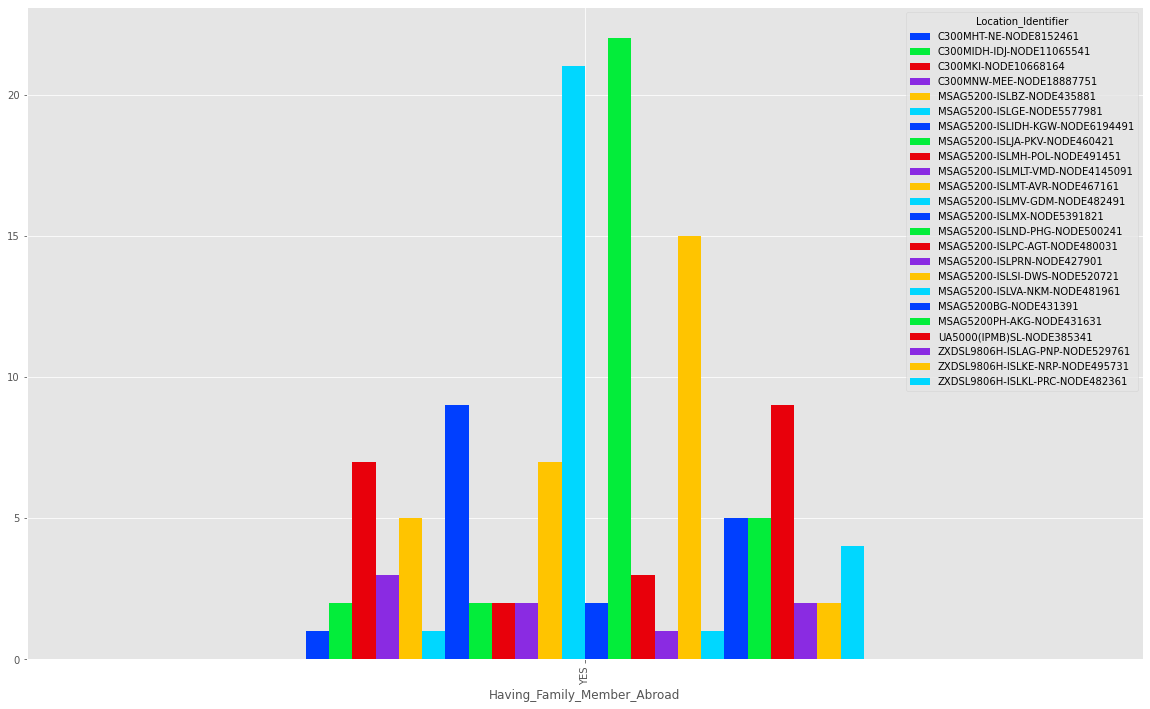

In [107]:
cluster_1[(cluster_1["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [108]:
cluster_1["Having_Working_Professionals"].value_counts(normalize=True)

NO_INFO    0.961066
YES        0.038934
Name: Having_Working_Professionals, dtype: float64

<AxesSubplot:xlabel='Having_Working_Professionals'>

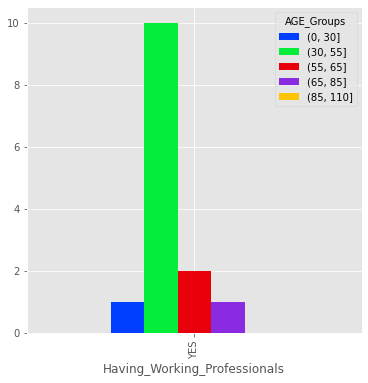

In [109]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

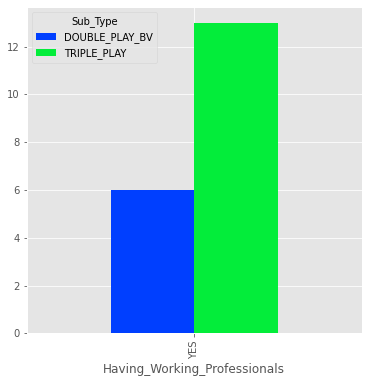

In [110]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

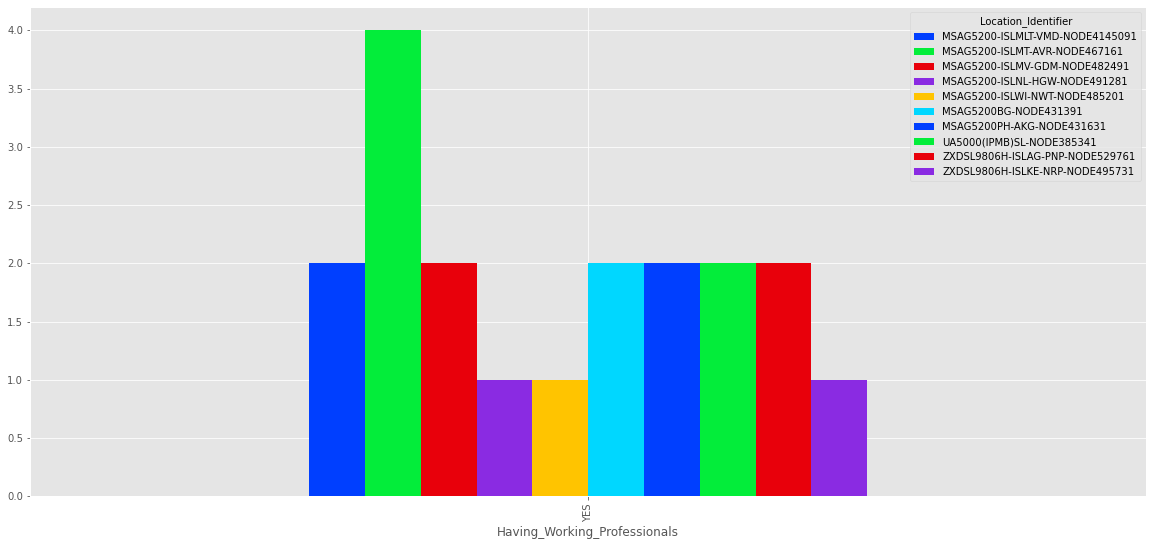

In [111]:
cluster_1[(cluster_1["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [112]:
cluster_1["Having_Teenagers_Students"].value_counts(normalize=True)

NO_INFO    0.985656
YES        0.014344
Name: Having_Teenagers_Students, dtype: float64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

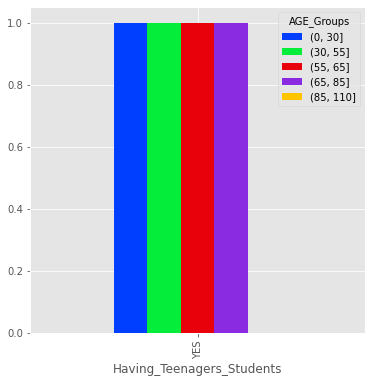

In [113]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

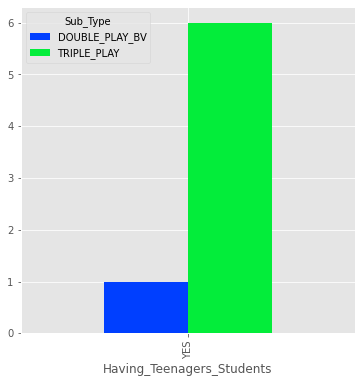

In [114]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

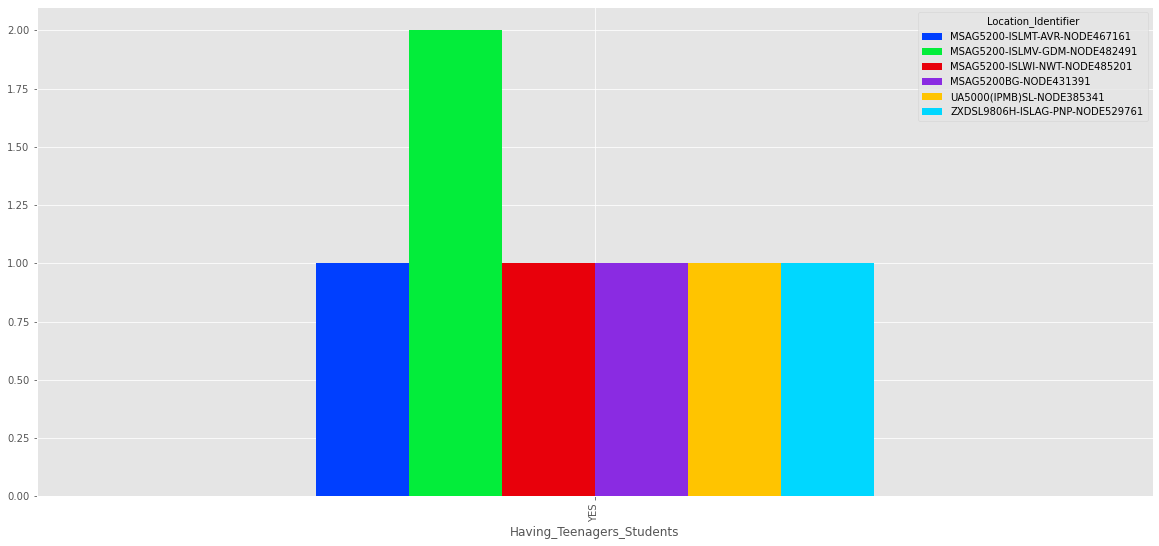

In [115]:
cluster_1[(cluster_1["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [116]:
cluster_1["Tamil_Customer"].value_counts(normalize=True)

NO_INFO    1.0
Name: Tamil_Customer, dtype: float64

#### Having Kids at Home

In [118]:
cluster_1["Having_Kids_at_Home"].value_counts(normalize=True)

NO_INFO    0.967213
YES        0.032787
Name: Having_Kids_at_Home, dtype: float64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

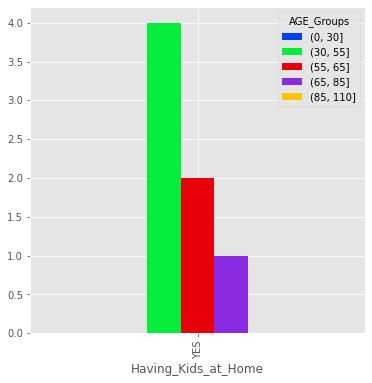

In [119]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

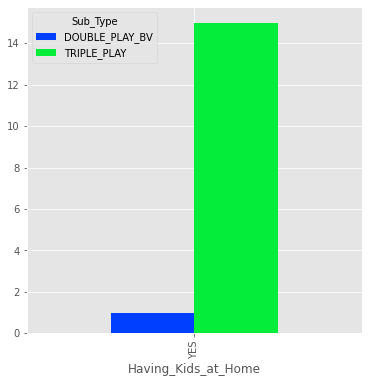

In [120]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

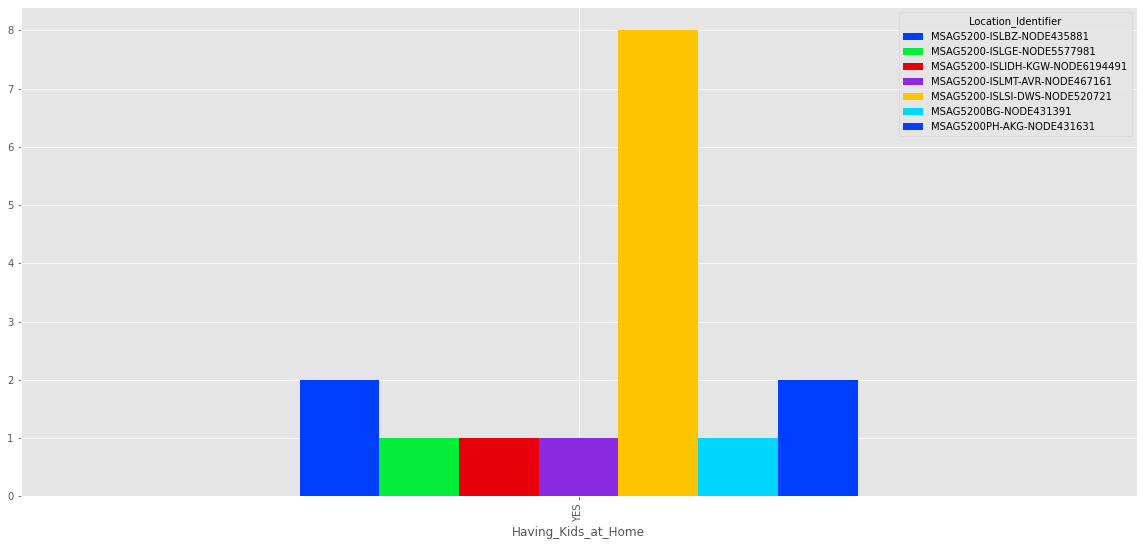

In [121]:
cluster_1[(cluster_1["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 1

#### Feasible locations to offer PeoTV

In [122]:
cluster_1_peo_loc = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY") | (cluster_1["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

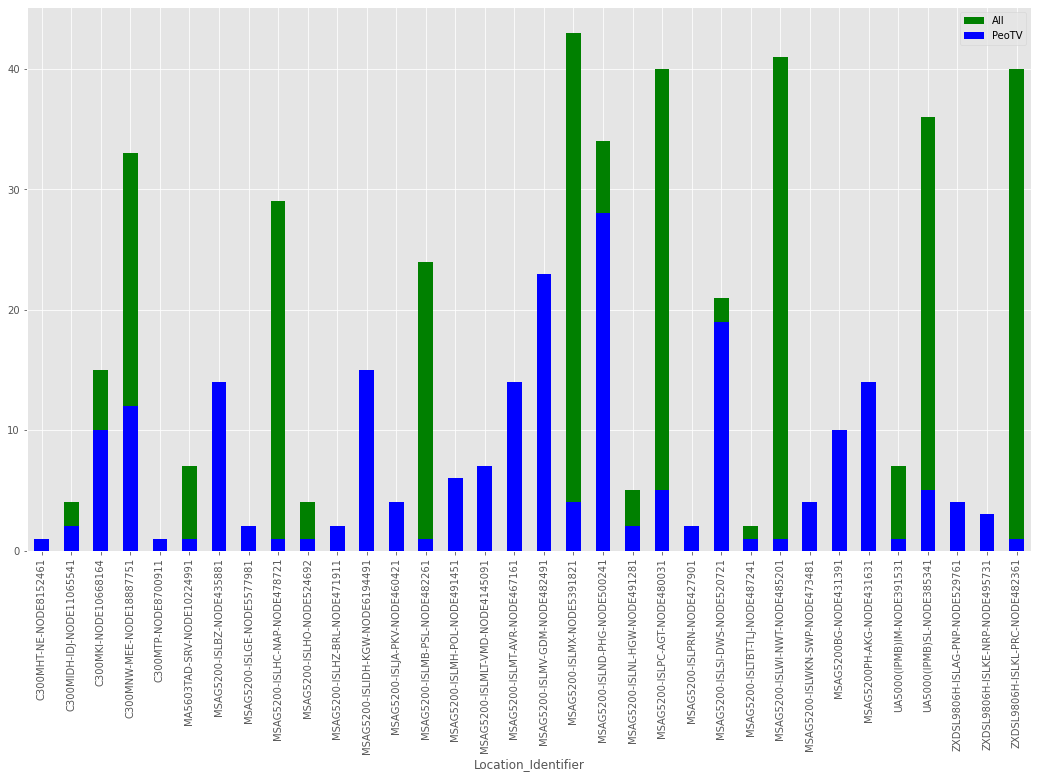

In [123]:
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [124]:
loc_precentage=(cluster_1_peo_loc/cluster_1_loc)*100

In [125]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461             100.000000
C300MKI-NODE10668164                66.666667
MA5603TAD-SRV-NODE10224991         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     62.500000
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMLT-VMD-NODE4145091     77.777778
MSAG5200-ISLMV-GDM-NODE482491       67.647059
MSAG5200-ISLMX-NODE5391821          80.000000
MSAG5200-ISLND-PHG-NODE500241       70.000000
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPRN-NODE427901         100.000000
ZXDSL9806H-ISLAG-PNP-NODE529761     80.000000
ZXDSL9806H-ISLKE-NRP-NODE495731     75.000000
Name: event_source.hash, dtype: float64

#### Feasible locations to offer Broadband

In [126]:
cluster_1_bb_loc = cluster_1[(cluster_1["Sub_Type"] == "TRIPLE_PLAY") | (cluster_1["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

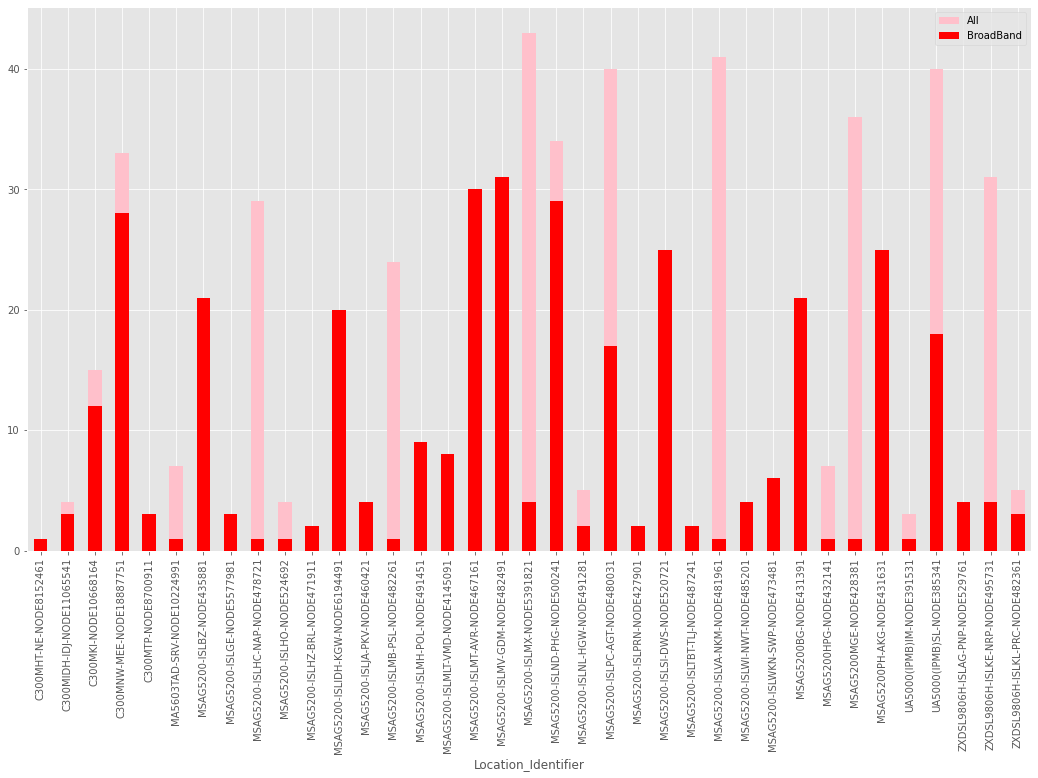

In [127]:
ax = cluster_1_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [128]:
loc_precentage=(cluster_1_bb_loc/cluster_1_loc)*100

In [129]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           75.000000
C300MKI-NODE10668164                80.000000
C300MNW-MEE-NODE18887751            84.848485
MA5603TAD-SRV-NODE10224991         100.000000
MSAG5200-ISLBZ-NODE435881           72.413793
MSAG5200-ISLGE-NODE5577981          75.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     83.333333
MSAG5200-ISLJA-PKV-NODE460421      100.000000
MSAG5200-ISLMH-POL-NODE491451       75.000000
MSAG5200-ISLMLT-VMD-NODE4145091     88.888889
MSAG5200-ISLMT-AVR-NODE467161       69.767442
MSAG5200-ISLMV-GDM-NODE482491       91.176471
MSAG5200-ISLMX-NODE5391821          80.000000
MSAG5200-ISLND-PHG-NODE500241       72.500000
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPC-AGT-NODE480031       80.952381
MSAG5200-ISLPRN-NODE427901         100.000000
MSAG5200-ISLSI

## Cluster 1- Findings